# Federated Learning with Tensorflow

## Testing neural network

## Smart + Dataset 

### Preprocessing

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")
plt.rcParams['figure.figsize'] = (25, 15)

In [2]:
path="/Users/daniel.bustillo/Documents/thesis"

In [3]:
os.chdir(path)

In [75]:
#Reading all years from House A

home_a_1_15= pd.read_csv("Dataset/HomeA/2015/HomeA-meter2_2015.csv",infer_datetime_format=True, index_col=0, parse_dates=True)
home_a_2_15= pd.read_csv("Dataset/HomeA/2015/HomeA-meter3_2015.csv",infer_datetime_format=True, index_col=0, parse_dates=True)

home_a_1_16= pd.read_csv("Dataset/HomeA/2016/HomeA-meter2_2016.csv",infer_datetime_format=True, index_col=0, parse_dates=True)
home_a_2_16= pd.read_csv("Dataset/HomeA/2016/HomeA-meter3_2016.csv",infer_datetime_format=True, index_col=0, parse_dates=True)


In [76]:
#Reading all years from House B

home_b_1 = pd.read_csv("Dataset/HomeB/2014/HomeB-meter1_2014.csv", infer_datetime_format=True, index_col=0, parse_dates=True)
home_b_2 = pd.read_csv("Dataset/HomeB/2014/HomeB-meter2_2014.csv", infer_datetime_format=True, index_col=0, parse_dates=True)

home_b_1_15 = pd.read_csv("Dataset/HomeB/2015/HomeB-meter1_2015.csv", infer_datetime_format=True, index_col=0, parse_dates=True)
home_b_2_15 = pd.read_csv("Dataset/HomeB/2015/HomeB-meter2_2015.csv", infer_datetime_format=True, index_col=0, parse_dates=True)


home_b_1_16 = pd.read_csv("Dataset/HomeB/2015/HomeB-meter1_2015.csv", infer_datetime_format=True, index_col=0, parse_dates=True)
home_b_2_16 = pd.read_csv("Dataset/HomeB/2015/HomeB-meter2_2015.csv", infer_datetime_format=True, index_col=0, parse_dates=True)





In [77]:
#Reading all years from House C
home_c_1 = pd.read_csv("Dataset/HomeC/2014/HomeC-meter1_2014.csv", infer_datetime_format=True, index_col=0, parse_dates=True)
home_c_2 = pd.read_csv("Dataset/HomeC/2014/HomeC-meter2_2014.csv", infer_datetime_format=True, index_col=0, parse_dates=True)

home_c_1_15 = pd.read_csv("Dataset/HomeC/2015/HomeC-meter1_2015.csv", infer_datetime_format=True, index_col=0, parse_dates=True)
home_c_2_15 = pd.read_csv("Dataset/HomeC/2015/HomeC-meter2_2015.csv", infer_datetime_format=True, index_col=0, parse_dates=True)

home_c_1_16 = pd.read_csv("Dataset/HomeC/2016/HomeC-meter1_2016.csv", infer_datetime_format=True, index_col=0, parse_dates=True)
home_c_2_16 = pd.read_csv("Dataset/HomeC/2016/HomeC-meter2_2016.csv", infer_datetime_format=True, index_col=0, parse_dates=True)


In [78]:
home_a_2_15= home_a_2_15.resample("30T").mean()
home_a_1_16=home_a_1_16.resample("30T").mean()
home_a_2_16 = home_a_2_16.resample("30T").mean()

In [79]:
home_b_2_15 = home_b_2_15.resample("30T").mean()
home_b_2_16 = home_b_2_16.resample("30T").mean()


In [80]:
home_c_1_15 = home_c_1_15.resample("30T").mean()
home_c_2_15 = home_c_2_15.resample("30T").mean()
home_c_1_16 = home_c_1_16.resample("30T").mean()
home_c_2_16 = home_c_2_16.resample("30T").mean()


In [81]:
home_c_1 = home_c_1.drop(['gen [kW]','House overall [kW]','Barn [kW]', 'Well [kW]','Microwave [kW]', 'Solar [kW]'], axis=1)

In [82]:
home_c_1_15= home_c_1_15.drop(['gen [kW]','House overall [kW]','Barn [kW]', 'Well [kW]','Microwave [kW]', 'Solar [kW]'], axis=1)

In [83]:
home_c_1_16 = home_c_1_16.drop(['gen [kW]','House overall [kW]','Barn [kW]', 'Well [kW]','Microwave [kW]', 'Solar [kW]'], axis=1)

In [84]:
#home_a_2 =home_a_2.drop("use [kW]", axis=1)
#home_a= home_a_1.merge(right= home_a_2, how="outer",left_index= True, right_index= True)

home_a_2_15 =home_a_2_15.drop("use [kW]", axis=1)
home_a_15= home_a_1_15.merge(right= home_a_2_15, how="outer",left_index= True, right_index= True)

home_a_2_16 =home_a_2_16.drop("use [kW]", axis=1)
home_a_16= home_a_1_16.merge(right= home_a_2_16, how="outer",left_index= True, right_index= True)


In [85]:
# dfs=[home_a, home_a_15, home_a_16]
dfs=[home_a_15, home_a_16]

home_a= pd.concat(dfs)

del home_a_1_15, home_a_2_15, home_a_1_16, home_a_2_16, home_a_15, home_a_16

In [86]:
home_b_2= home_b_2.drop('use [kW]', axis=1)
home_b= home_b_1.merge(right=home_b_2, how='outer', left_index=True, right_index=True)

home_b_2_15= home_b_2_15.drop('use [kW]', axis=1)
home_b_15= home_b_1_15.merge(right=home_b_2_15, how='outer', left_index=True, right_index=True)

home_b_2_16= home_b_2_16.drop('use [kW]', axis=1)
home_b_16= home_b_1_16.merge(right=home_b_2_16, how='outer', left_index=True, right_index=True)

In [87]:
dfs=[home_b, home_b_15, home_b_16]

home_b = pd.concat(dfs)

del home_b_1, home_b_2, home_b_1_15, home_b_2_15, home_b_1_16, home_b_2_16, home_b_15, home_b_16

In [88]:
home_c_2= home_c_2.drop('use [kW]', axis=1)
home_c= home_c_1.merge(right=home_c_2, how='outer', left_index=True, right_index=True)

home_c_2_15= home_c_2_15.drop('use [kW]', axis=1)
home_c_15= home_c_1_15.merge(right=home_c_2_15, how='outer', left_index=True, right_index=True)

home_c_2_16= home_c_2_16.drop('use [kW]', axis=1)
home_c_16= home_c_1_16.merge(right=home_c_2_16, how='outer', left_index=True, right_index=True)

In [89]:
dfs=[home_c, home_c_15, home_c_16]

home_c = pd.concat(dfs)

del home_c_1, home_c_2, home_c_1_15, home_c_2_15, home_c_1_16, home_c_2_16, home_c_15, home_c_16

In [90]:
#sum all of the electricity consumption
def sum_power(df, label="total"):
    df[label] = df.sum(axis=1)
    return df

In [91]:
#home_a['total'].plot(figsize=(25,5),logy=False, lw=1)

def plot_electricity(df, label="total", figsize=(25,10)):
    df[label].plot(figsize=figsize, lw=1)


In [92]:
sum_power(home_a)
sum_power(home_b)
sum_power(home_c)

use [kW]  Dishwasher [kW]  Furnace 1 [kW]  \
Date & Time                                                      
2014-01-01 00:00:00  2.108589         0.000023        0.100391   
2014-01-01 00:30:00  1.828066         0.000059        0.170241   
2014-01-01 01:00:00  0.960618         0.000062        0.191079   
2014-01-01 01:30:00  0.956158         0.000056        0.227550   
2014-01-01 02:00:00  1.111968         0.000056        0.272573   
...                       ...              ...             ...   
2016-12-15 20:00:00  1.275240         0.000086        0.341409   
2016-12-15 20:30:00  1.245221         0.000114        0.340337   
2016-12-15 21:00:00  1.105359         0.000073        0.306634   
2016-12-15 21:30:00  1.095356         0.000098        0.238128   
2016-12-15 22:00:00  1.840413         0.000072        0.331055   

                     Furnace 2 [kW]  Home office [kW]  Fridge [kW]  \
Date & Time                                                          
2014-01-01 00:00:00        0.063347          0.040204     0.136891   
2014-01-01 00:30:00        0.063181          0.039184     0.146551   
2014-01-01 01:00:00        0.129996          0.039070     0.063167   
2014-01-01 01:30:00        0.274561          0.039026     0.005300   
2014-01-01 02:00:00        0.376884          0.038959     0.005165   
...                             ...               ...          ...   
2016-12-15 20:00:00        0.504738          0.041889     0.039443   
2016-12-15 20:30:00        0.460352          0.041953     0.058838   
2016-12-15 21:00:00        0.424716          0.041962     0.005071   
2016-12-15 21:30:00        0.443923          0.041838     0.095056   
2016-12-15 22:00:00        0.566479          0.042056     0.005744   

                     Wine cellar [kW]  Garage door [kW]  Kitchen 12 [kW]  \
Date & Time                                                                
2014-01-01 00:00:00          0.004294          0.009579         0.000168   
2014-01-01 00:30:00          0.004210          0.009384         0.000261   
2014-01-01 01:00:00          0.004314          0.009709         0.000547   
2014-01-01 01:30:00          0.004406          0.009844         0.000677   
2014-01-01 02:00:00          0.004447          0.009871         0.000669   
...                               ...               ...              ...   
2016-12-15 20:00:00          0.123181          0.012707         0.000586   
2016-12-15 20:30:00          0.123087          0.012778         0.000547   
2016-12-15 21:00:00          0.122604          0.012830         0.000684   
2016-12-15 21:30:00          0.008894          0.013084         0.000424   
2016-12-15 22:00:00          0.008231          0.022735         0.000523   

                     Kitchen 14 [kW]  Kitchen 38 [kW]  Living room [kW]  \
Date & Time                                                               
2014-01-01 00:00:00         0.000023         0.000003          0.102349   
2014-01-01 00:30:00         0.000126         0.000002          0.038129   
2014-01-01 01:00:00         0.000039         0.000004          0.007687   
2014-01-01 01:30:00         0.000034         0.000007          0.004327   
2014-01-01 02:00:00         0.000007         0.000008          0.001753   
...                              ...              ...               ...   
2016-12-15 20:00:00         0.000163         0.000018          0.001269   
2016-12-15 20:30:00         0.000199         0.000019          0.001282   
2016-12-15 21:00:00         0.000122         0.000012          0.001273   
2016-12-15 21:30:00         0.000212         0.000013          0.001267   
2016-12-15 22:00:00         0.000148         0.000014          0.100181   

                     gen [kW]  LivingRoomOutlets [kW]  Barn [kW]  Well [kW]  \
Date & Time                                                                   
2014-01-01 00:00:00  0.004111                0.102349   0.087442   0.000116   
2014-01-01 00:30:00  0.004041                0.03

In [94]:
# We subset the data to only have 1 and a half years, it seems that the whole month of June is corrupted
home_a = home_a.loc[home_a.index>"2015-07-01"].copy()

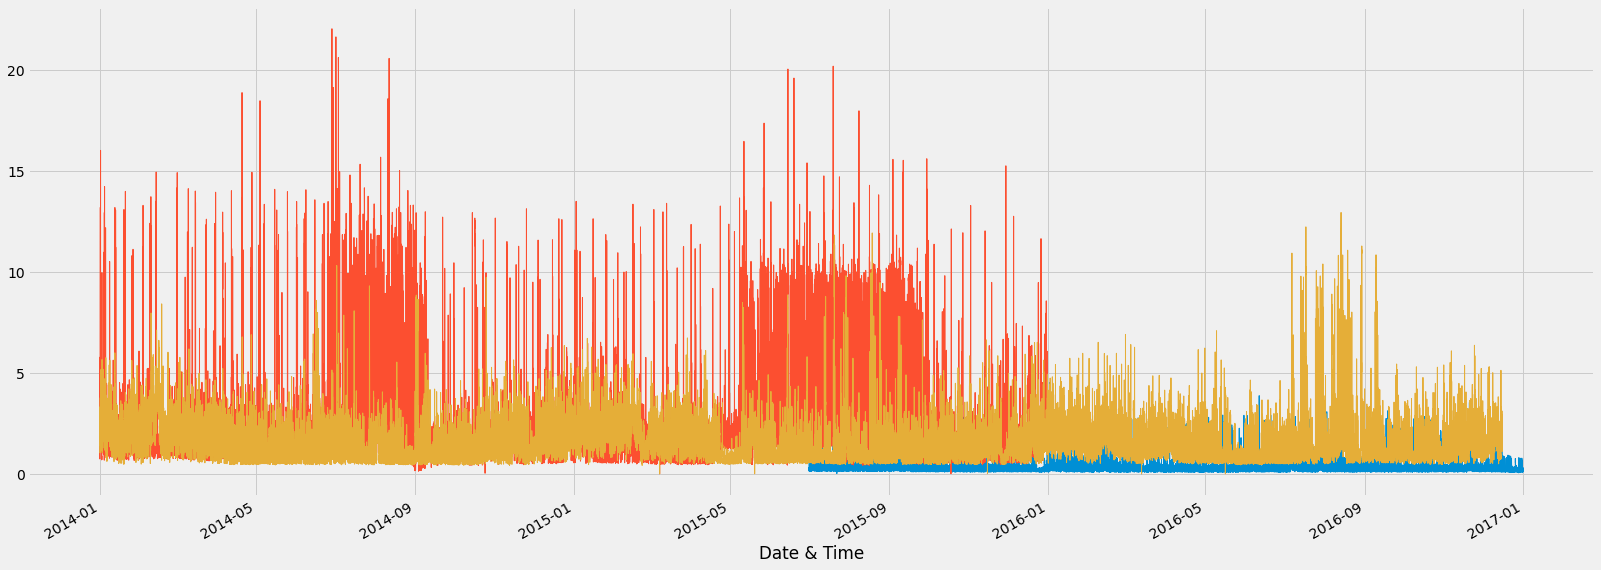

In [100]:
plot_electricity(home_a)
plot_electricity(home_b)
plot_electricity(home_c)

In [150]:
cols_outliers = ['MasterOutlets [kW]','MasterLights [kW]','KitchenLights [kW]', 'BedroomOutlets [kW]','BedroomLights [kW]','DuctHeaterHRV [kW]','ElectricRange [kW]','Dryer [kW]','GarageMudroomLights [kW]',
'DiningRoomOutlets [kW]','MudroomOutlets [kW]','MasterBathOutlets [kW]','GarageOutlets [kW]','BasementOutdoorOutlets [kW]']

<AxesSubplot:xlabel='Date & Time'>

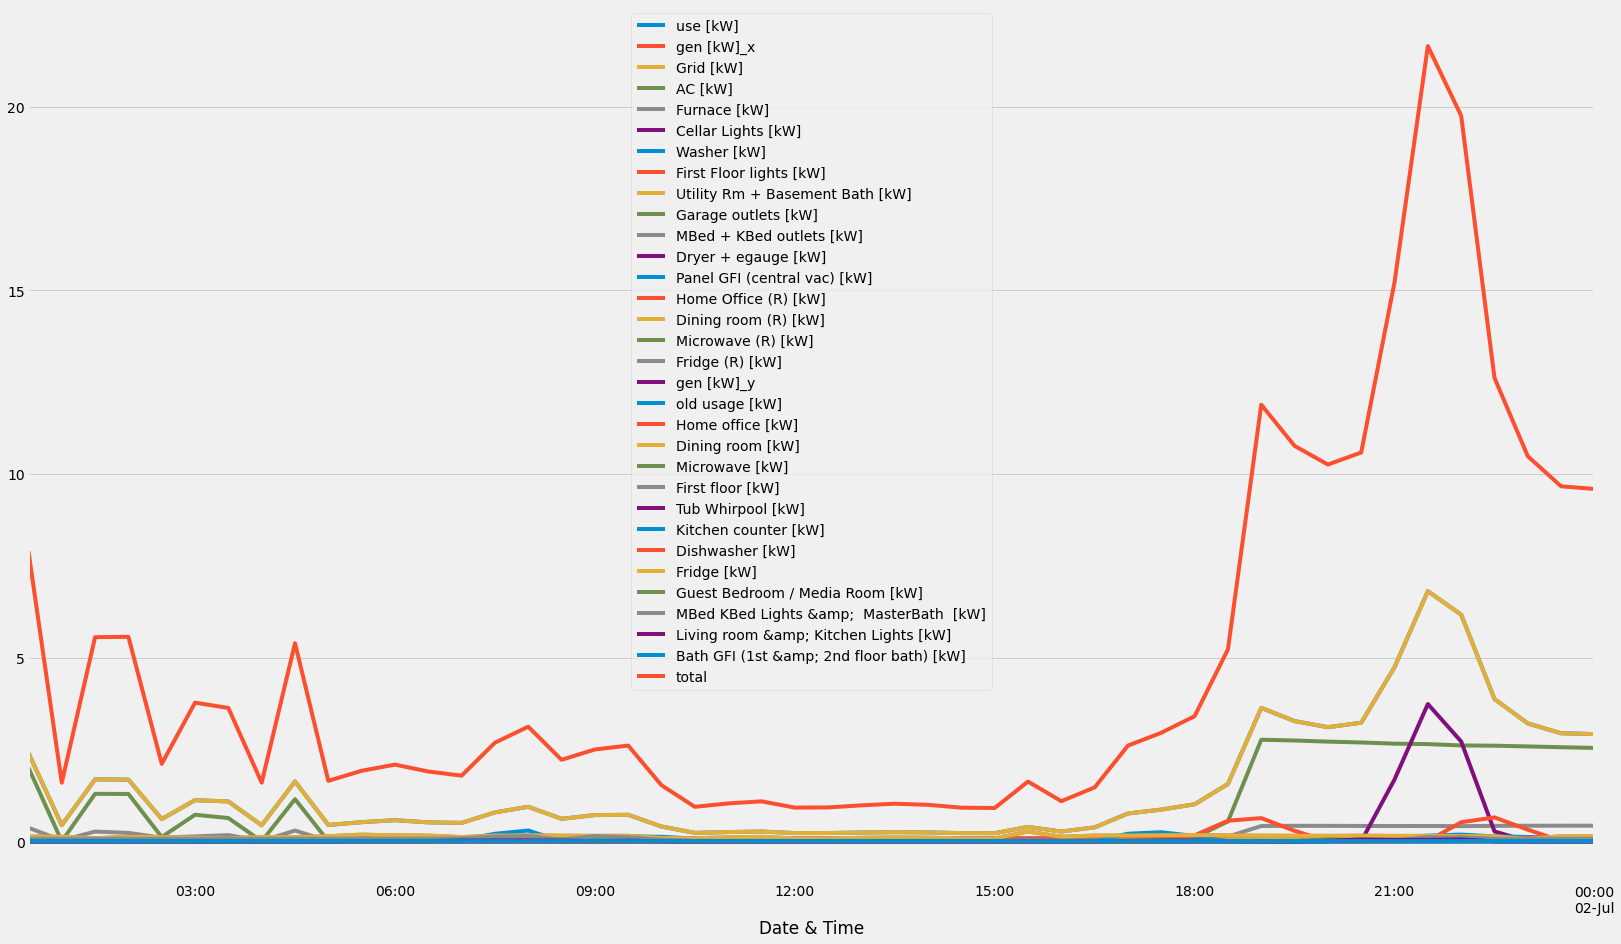

In [109]:
home_b.loc[(home_b.index>"2014-07-01") & (home_b.index<= "2014-07-02")].plot(logy=False)

### Feature Engineering

In [151]:
def rm_outliers(df,cols):
    for i in cols:
        df[i] = np.where(df[i]>4,df[i].median(),df[i])
    return df.describe()


In [152]:
rm_outliers(home_a, cols_outliers)

use [kW]  gen [kW]_x  FurnaceHRV [kW]  CellarOutlets [kW]  \
count   26399.0     26399.0     26399.000000        26399.000000   
mean        0.0         0.0         0.158699            0.080120   
std         0.0         0.0         0.203181            0.036959   
min         0.0         0.0         0.003162            0.000317   
25%         0.0         0.0         0.010063            0.049604   
50%         0.0         0.0         0.086205            0.085248   
75%         0.0         0.0         0.160827            0.114262   
max         0.0         0.0         0.929004            0.223113   

       WashingMachine [kW]  FridgeRange [kW]  DisposalDishwasher [kW]  \
count         2.639900e+04      2.639900e+04             26399.000000   
mean          4.914432e-04      1.340545e-03                 0.000135   
std           7.119371e-04      7.521273e-03                 0.000134   
min           5.560000e-07      5.560000e-07                 0.000000   
25%           3.305550e-05      9.244440e-04                 0.000033   
50%           1.088890e-04      1.013889e-03                 0.000076   
75%           6.650000e-04      1.048333e-03                 0.000212   
max           7.663889e-03      6.453717e-01                 0.001198   

       KitchenLights [kW]  BedroomOutlets [kW]  BedroomLights [kW]  ...  \
count        26399.000000         26399.000000        26399.000000  ...   
mean             0.000051             0.008721            0.005913  ...   
std              0.000073             0.005016            0.005456  ...   
min              0.000000             0.000183            0.000117  ...   
25%              0.000009             0.004098            0.004606  ...   
50%              0.000022             0.007965            0.004656  ...   
75%              0.000067             0.011069            0.004705  ...   
max              0.001560             0.153472            0.083535  ...   

       DuctHeaterHRV [kW]  gen [kW]_y  ElectricRange [kW]    Dryer [kW]  \
count        26399.000000     25625.0        25625.000000  25625.000000   
mean             0.003626         0.0            0.021898      0.045901   
std              0.008781         0.0            0.168479      0.234988   
min              0.000006         0.0            0.000067      0.000014   
25%              0.000030         0.0            0.003816      0.003411   
50%              0.000047         0.0            0.003881      0.003771   
75%              0.000137         0.0            0.003948      0.003829   
max              0.051692         0.0            2.750854      2.635057   

       GarageMudroomLights [kW]  DiningRoomOutlets [kW]  MudroomOutlets [kW]  \
count              25625.000000            25625.000000         25625.000000   
mean                   0.009652                0.002095             0.014118   
std                    0.013107                0.011892             0.037400   
min                    0.000067                0.000003             0.000005   
25%                    0.003744                0.001757             0.002926   
50%                    0.003880                0.001802             0.002950   
75%                    0.004722                0.001854             0.002999   
max                    0.121070                0.868588             0.370500   

       MasterBathOutlets [kW]  GarageOutlets [kW]  BasementOutdoorOutlets [kW]  
count            25625.000000        25625.000000                 25625.000000  
mean                 0.010787            0.006705                     0.006255  
std                  0.044727            0.003200                     0.025607  
min                  0.000083            0.000067                     0.000000  
25%                  0.004814            0.005921                     0.000603  
50%                  0.004839            0.006016                     0.004389  
75%                  0.004865            0.006087                     0.008035  
max            

In [112]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index.
    """
    # df = df.copy()
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['night']= np.where((df['hour']>=18)|(df['hour']<6),1,0)
    
    # X = df[['hour','dayofweek','quarter','month','year',
    #        'dayofyear','dayofmonth']]
    # if label:
    #     y = df[label]
    #     return X, y
    # return X

# X, y = create_features(home_a, label='total')

# features_and_target = pd.concat([X, y], axis=1)

In [113]:
create_features(home_a)
create_features(home_b)
create_features(home_c)

In [114]:
feats= home_a.select_dtypes(np.float64)

In [115]:
from scipy import stats
bc_fitted_feature, bc_fitted_lambda = stats.boxcox(home_a['total']+1) # Again, we are adding 1 because all features have 0s (not allowed in BC)

bc_fitted_lambda

-3.86926143068849

In [116]:
home_a['total_transformed'] = bc_fitted_feature

<AxesSubplot:xlabel='Date & Time'>

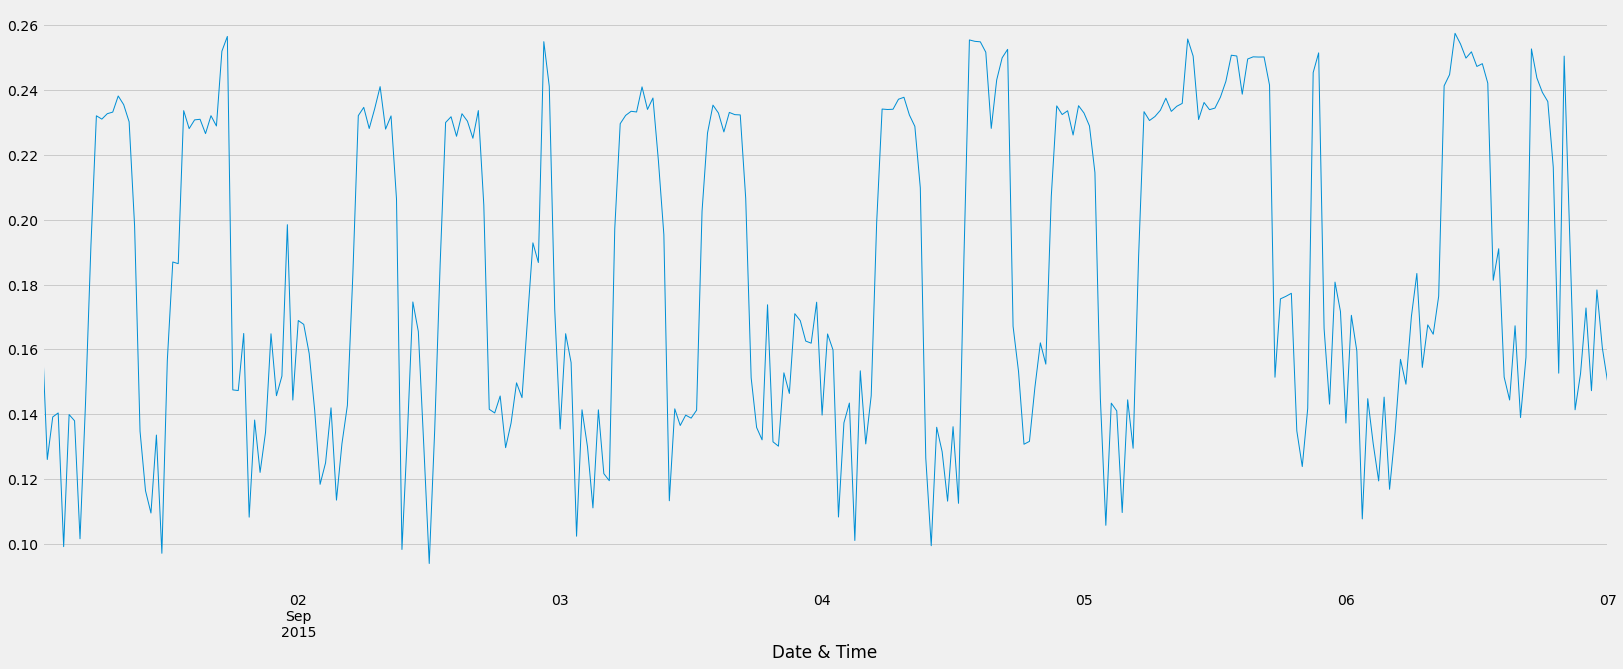

In [120]:
home_a.loc[(home_a.index>"2015-09-01")&(home_a.index<="2015-09-07")]['total_transformed'].plot(figsize=(25,10), lw=1)

### Simple ARIMA model

In [121]:
# simple ARIMA model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

In [122]:
#Augmented Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller

result = adfuller(home_a['total_transformed'].dropna(),autolag="AIC")
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -12.165883
p-value: 0.000000


In [123]:
#Fitting the model
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
from pmdarima import model_selection
from sklearn.metrics import mean_squared_error


train, test = model_selection.train_test_split(home_a, train_size=0.7)


In [139]:

# Fit a simple auto_arima model
arima = pm.auto_arima(train['total_transformed'], start_p=1, start_q=1, start_P=1, start_Q=1,
                     max_p=5, max_q=5, max_P=5, max_Q=5, seasonal=True,
                     stepwise=True, suppress_warnings=True, D=10, max_D=10,
                     error_action='ignore')

preds, conf_int = arima.predict(n_periods=test.shape[0], return_conf_int=True)


In [141]:
# Print the error:
preds, conf_int= arima.predict(n_periods=test.shape[0], return_conf_int=True)

In [142]:
# Print the error:
print("Test RMSE: %.3f" % np.sqrt(mean_squared_error(test['total'], preds)))

Test RMSE: 0.394


Text(0.5, 0, 'Year')

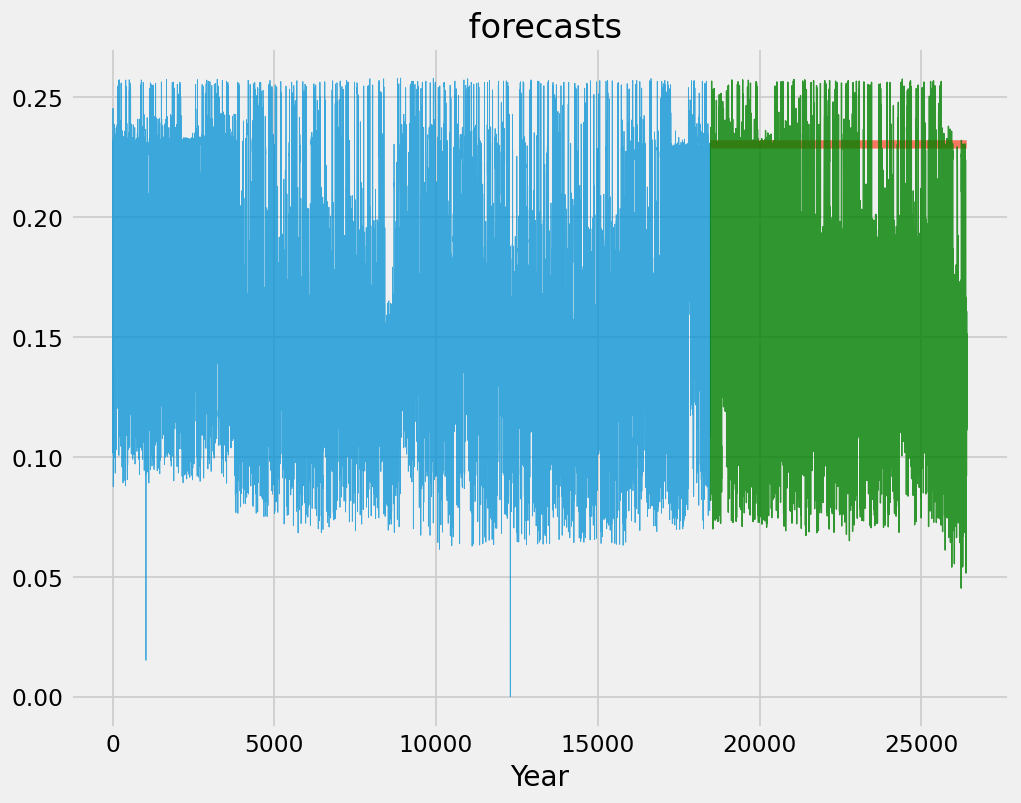

In [143]:
# Plot the points and the forecasts
x_axis = np.arange(train.shape[0] + preds.shape[0])
x_years = x_axis 

plt.plot(x_years[x_axis[:train.shape[0]]], train['total_transformed'], alpha=0.75, lw=0.5)
plt.plot(x_years[x_axis[train.shape[0]:]], preds, alpha=0.75, lw=5)  # Forecasts
plt.plot(x_years[x_axis[train.shape[0]:]], test['total_transformed'],
            alpha=0.8, c="g", lw=0.8)  # Test data
# plt.fill_between(x_years[x_axis[-preds.shape[0]:]],
#                  conf_int[:, 0], conf_int[:, 1],
#                  alpha=0.1, color='b')
plt.title(" forecasts")
plt.xlabel("Year")

In [147]:
test.shape

(7921, 33)

In [149]:
preds= arima.predict(n_periods=test.shape[0], X=test)

<AxesSubplot:>

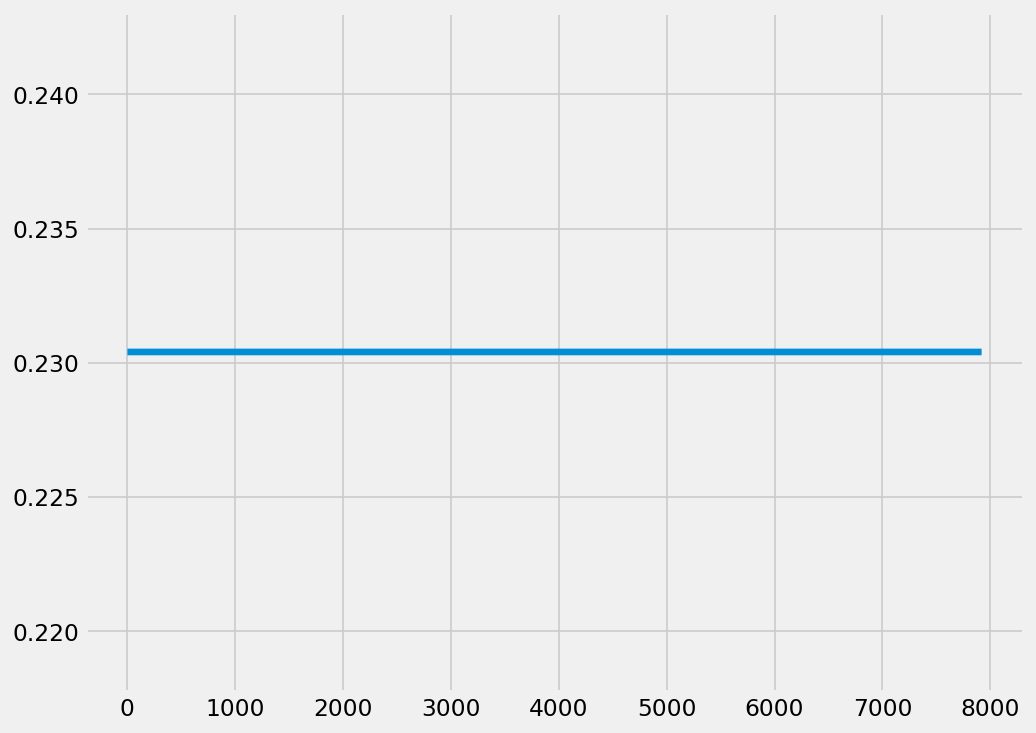

In [150]:
pd.Series(preds).plot()

### Forecasting using Prophet


In [152]:
from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

In [153]:
#Split date
date= "2016-09-18"
X_train = home_a.loc[home_a.index<= date].copy()
X_test = home_a.loc[home_a.index> date].copy()

<AxesSubplot:xlabel='Date & Time'>

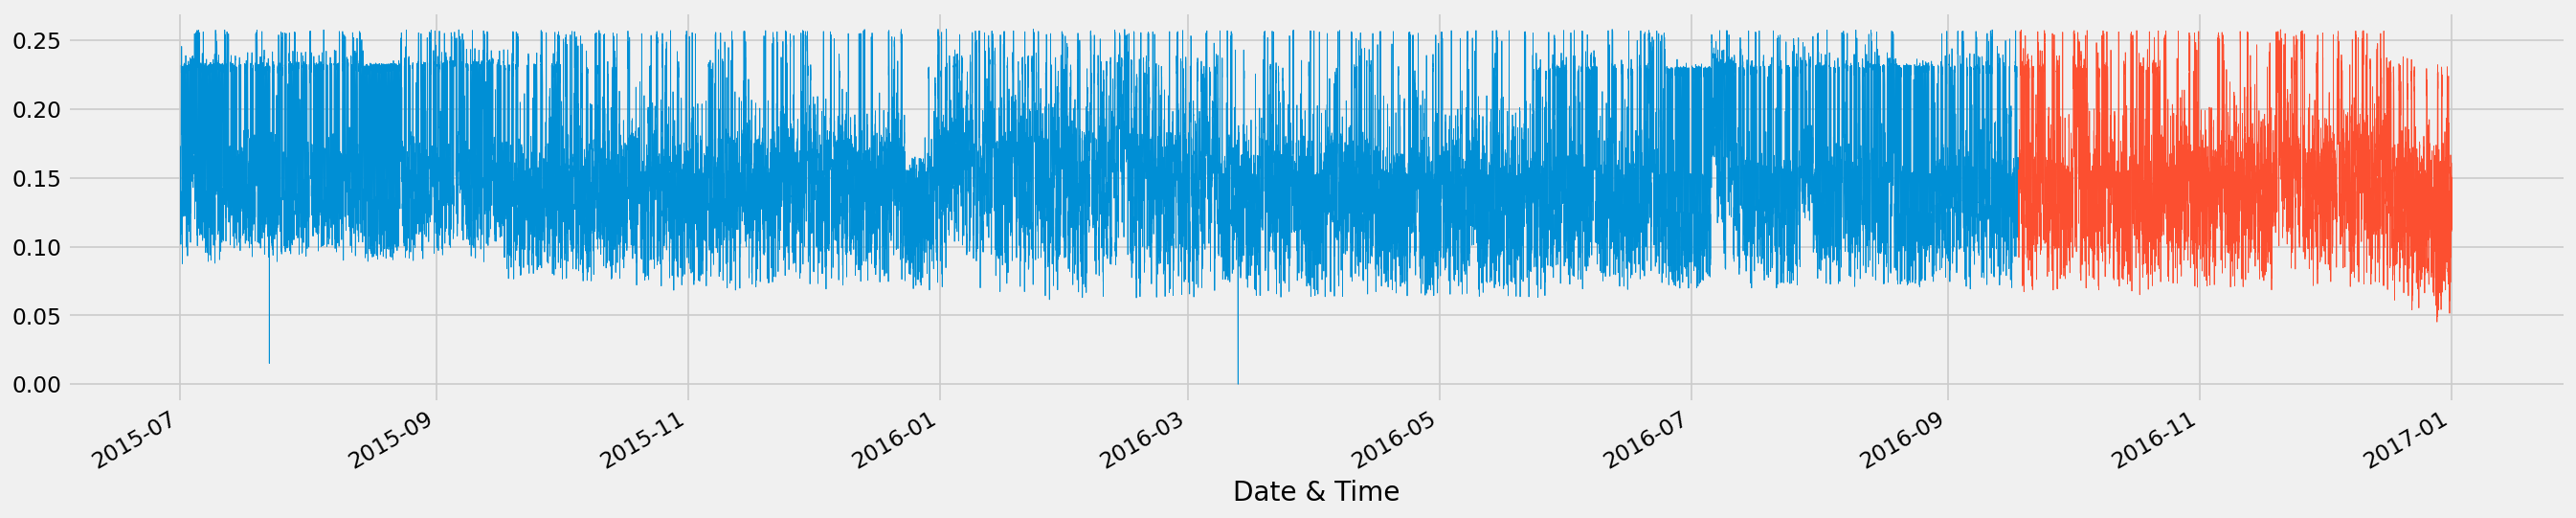

In [154]:
X_train['total_transformed'].plot(lw=0.5, figsize=(25,5))
X_test['total_transformed'].plot(lw=0.5)

In [106]:
# # Plot train and test so you can see where we have split
# X_train \
#     .rename(columns={'total': 'TRAIN SET'}) \
#     .merge(X_test.rename(columns={'total': 'TEST SET'}),
#           how='outer') \
#     .plot(figsize=(15,5), title='Train/test split', style='.',alpha= 0.5)
# plt.show()

In [155]:
X_train['ds']= X_train.index
X_test['ds'] = X_test.index

X_train = X_train[['ds','total_transformed']]
X_test = X_test[['ds','total_transformed']]

In [156]:
# Format data for prophet model using ds and y
X_train.reset_index() \
    .rename(columns={
                     'total_transformed':'y'}).head()

Date & Time                  ds         y
0 2015-07-01 00:30:00 2015-07-01 00:30:00  0.173060
1 2015-07-01 01:00:00 2015-07-01 01:00:00  0.141039
2 2015-07-01 01:30:00 2015-07-01 01:30:00  0.127123
3 2015-07-01 02:00:00 2015-07-01 02:00:00  0.112261
4 2015-07-01 02:30:00 2015-07-01 02:30:00  0.140203

In [157]:
X_train =X_train.reset_index()
X_train= X_train[['ds','total_transformed']]
X_train =X_train.rename(columns={"total_transformed":"y"})


In [158]:
X_train

ds         y
0     2015-07-01 00:30:00  0.173060
1     2015-07-01 01:00:00  0.141039
2     2015-07-01 01:30:00  0.127123
3     2015-07-01 02:00:00  0.112261
4     2015-07-01 02:30:00  0.140203
...                   ...       ...
21357 2016-09-17 22:00:00  0.138294
21358 2016-09-17 22:30:00  0.162075
21359 2016-09-17 23:00:00  0.164851
21360 2016-09-17 23:30:00  0.126405
21361 2016-09-18 00:00:00  0.157989

[21362 rows x 2 columns]

In [159]:
model= Prophet(interval_width=0.95,yearly_seasonality=True)
model.fit(X_train)

Initial log joint probability = -359.91


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      71       30100.7   9.17796e-05       67.3747   1.342e-06       0.001      135  LS failed, Hessian reset 
      79       30100.7   1.97957e-06       42.6713      0.5721      0.5721      145   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [27]:
import itertools

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here









# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(X_train)  # Fit model with given params
    df_cv = cross_validation(m, horizon='1 day', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Initial log joint probability = -79.7855
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       44454.5    0.00296322        454.96           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       44460.3   0.000303578       86.1604           1           1      248   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       44463.6   0.000434989       306.487      0.4841      0.4841      369   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     375       44464.5   1.92098e-05       94.7164   9.823e-08       0.001      514  LS failed, Hessian reset 
     399       44464.6   1.55825e-05       69.7503      0.6728      0.6728      547   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     417       44464.7   1.54792e-05    

INFO:prophet:Making 874 forecasts with cutoffs between 2015-07-08 12:00:00 and 2016-09-17 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fb7c0ce1940>


Initial log joint probability = -5.52405
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       635.505   1.71231e-06        4821.1      0.4997       0.124      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     134       639.531   0.000963557       4594.73   1.938e-07       0.001      219  LS failed, Hessian reset 
     172       642.452   7.98732e-09       4895.95     0.08885     0.08885      276   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
Initial log joint probability = -6.6391
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
       1       -6.6391             0       359.807       1e-12       0.001       25   
Optimization terminated with error: 
  Line search failed to achieve a sufficient decrease, no more progress can be made

Initial log joint probability = -135.767
Ite

Initial log joint probability = -5.62042Iteration  2. Log joint probability =    554.798. Improved by 203.036.

    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      91       677.926   5.27659e-09       4545.86      0.1431      0.5599      113   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
Iteration  3. Log joint probability =    565.026. Improved by 10.2284.
Initial log joint probability = -6.20616
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Iteration  4. Log joint probability =    578.898. Improved by 13.8722.
      73       687.418   4.79949e-09       4654.46      0.3849      0.3849       91   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
Iteration  5. Log joint probability =    584.572. Improved by 5.67316.
Iteration  6. Log joint probability =    602.908. Improved by 18.3

Iteration  2. Log joint probability =    659.344. Improved by 233.857.
Initial log joint probability = -6.42153
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Iteration  3. Log joint probability =    757.609. Improved by 98.2652.
      99       804.025   5.77763e-06       4870.14      0.9548      0.9548      135   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     124       804.082    1.6056e-06       4964.17   3.164e-10       0.001      221  LS failed, Hessian reset 
     150       804.092   9.80308e-09       5142.57       0.341       0.341      255   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
Initial log joint probability = -8.49602
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Iteration  4. Log joint probability =    761.747. Improved by 4.13789.
       1      -8.49602             0   

Iteration  5. Log joint probability =    762.547. Improved by 0.799974.
Iteration  6. Log joint probability =    771.987. Improved by 9.44036.
Iteration  1. Log joint probability =    450.523. Improved by 720.474.
Iteration  7. Log joint probability =    772.218. Improved by 0.230277.
Iteration  8. Log joint probability =    772.266. Improved by 0.0486765.
Iteration  2. Log joint probability =    740.603. Improved by 290.08.
Iteration  9. Log joint probability =    772.314. Improved by 0.0471692.
Iteration  3. Log joint probability =    867.261. Improved by 126.658.
Iteration 10. Log joint probability =     772.38. Improved by 0.0663299.
Iteration 11. Log joint probability =    772.408. Improved by 0.0279001.
Iteration  4. Log joint probability =    869.552. Improved by 2.29173.
Iteration 12. Log joint probability =    772.411. Improved by 0.00291726.
Iteration  5. Log joint probability =     872.21. Improved by 2.65757.
Iteration 13. Log joint probability =    772.426. Improved by 0.0

Iteration  1. Log joint probability =     476.93. Improved by 792.538.
Iteration 33. Log joint probability =    876.732. Improved by 1.05933e-05.
Iteration 34. Log joint probability =    876.732. Improved by 1.81744e-05.
Iteration  2. Log joint probability =    496.952. Improved by 20.0225.
Iteration 35. Log joint probability =    876.732. Improved by 0.0003205.
Iteration  3. Log joint probability =    838.173. Improved by 341.221.
Iteration 36. Log joint probability =    876.732. Improved by 0.000145487.
Iteration  4. Log joint probability =    859.796. Improved by 21.623.
Iteration 37. Log joint probability =    876.732. Improved by 1.18893e-05.
Iteration  5. Log joint probability =    873.208. Improved by 13.4114.
Iteration 38. Log joint probability =    876.732. Improved by 8.70102e-05.
Iteration 39. Log joint probability =    876.732. Improved by 2.92578e-05.
Iteration  6. Log joint probability =    873.297. Improved by 0.0896969.
Iteration 40. Log joint probability =    876.732. 

INFO:prophet:Skipping MAPE because y close to 0
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Initial log joint probability = -79.7855
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      42       44175.4   1.36121e-05        2847.3    4.92e-09       0.001      103  LS failed, Hessian reset 
      99         44178   3.58267e-05       2530.99       1.106      0.1106      191   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     140       44180.3   0.000177438       3636.26   5.339e-08       0.001      277  LS failed, Hessian reset 
     199       44181.7    3.2821e-05       2609.27           1           1      363   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       44184.3   2.00843e-05       2765.21           1           1      505   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     318       44185.4   0.000255496       3232.47   6.688e-08       0.001      578  LS failed, Hessian rese

INFO:prophet:Making 874 forecasts with cutoffs between 2015-07-08 12:00:00 and 2016-09-17 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fb7ab3b2220>


Initial log joint probability = -5.52405
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      79       687.773   4.59198e-09       4822.38      0.5974      0.5974      101   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
Initial log joint probability = -6.20616
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -5.62042
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      86       751.738   7.79863e-09       4784.59      0.6058      0.6058      117   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
      99       739.588   0.000113257       5036.56           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     105       742.521   0.000163966  

Iteration  2. Log joint probability =     490.59. Improved by 134.032.
Iteration  3. Log joint probability =    623.341. Improved by 132.751.
Iteration  4. Log joint probability =    640.079. Improved by 16.7386.
Iteration  5. Log joint probability =    647.524. Improved by 7.44489.
Iteration  6. Log joint probability =    651.622. Improved by 4.09793.
Iteration  7. Log joint probability =    652.651. Improved by 1.02917.
Iteration  8. Log joint probability =    654.176. Improved by 1.52487.
Iteration  9. Log joint probability =    654.358. Improved by 0.181857.
Iteration 10. Log joint probability =    654.387. Improved by 0.029101.
Iteration 11. Log joint probability =    654.535. Improved by 0.148402.
Iteration 12. Log joint probability =    654.606. Improved by 0.0703375.
Iteration 13. Log joint probability =    654.618. Improved by 0.0127796.
Iteration 14. Log joint probability =    654.651. Improved by 0.0327512.
Iteration 15. Log joint probability =    654.653. Improved by 0.0015

Iteration  1. Log joint probability =    445.295. Improved by 703.682.
Initial log joint probability = -8.49602
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
       1      -8.49602             0       502.746       1e-12       0.001       29   
Optimization terminated with error: 
  Line search failed to achieve a sufficient decrease, no more progress can be made

Initial log joint probability = -302.187
Iteration  2. Log joint probability =    689.388. Improved by 244.093.
Iteration  1. Log joint probability =    383.119. Improved by 685.306.
Iteration  3. Log joint probability =    814.309. Improved by 124.921.
Iteration  2. Log joint probability =    858.303. Improved by 475.185.
Iteration  4. Log joint probability =    822.415. Improved by 8.10638.
Iteration  5. Log joint probability =    822.949. Improved by 0.533834.
Iteration  3. Log joint probability =    928.263. Improved by 69.9594.
Iteration  6. Log joint probability =    823.202

Iteration 30. Log joint probability =    931.861. Improved by 0.00626321.
Iteration  1. Log joint probability =    492.238. Improved by 840.083.
Iteration 31. Log joint probability =    931.862. Improved by 0.00101471.
Iteration  2. Log joint probability =    803.686. Improved by 311.448.
Iteration 32. Log joint probability =    931.869. Improved by 0.00697418.
Iteration  3. Log joint probability =    915.176. Improved by 111.49.
Iteration 33. Log joint probability =    931.869. Improved by 0.000211547.
Iteration  4. Log joint probability =    935.808. Improved by 20.6316.
Iteration 34. Log joint probability =    931.877. Improved by 0.0075422.
Iteration  5. Log joint probability =    949.665. Improved by 13.8571.
Iteration 35. Log joint probability =    931.896. Improved by 0.0193792.
Iteration  6. Log joint probability =    952.052. Improved by 2.3877.
Iteration 36. Log joint probability =    931.899. Improved by 0.0027472.
Iteration  7. Log joint probability =    953.056. Improved b

INFO:prophet:Skipping MAPE because y close to 0
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Initial log joint probability = -79.7855
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      37       44174.2   0.000324597       2975.35   1.354e-07       0.001       98  LS failed, Hessian reset 
      66       44175.7    1.9803e-05       2480.43   6.832e-09       0.001      173  LS failed, Hessian reset 
      99       44176.4   0.000673394       3304.41      0.8246      0.8246      219   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     103       44177.9   0.000701819       2779.04   2.144e-07       0.001      274  LS failed, Hessian reset 
     161       44179.2   2.48915e-06       2487.63   8.507e-10       0.001      412  LS failed, Hessian reset 
     171       44179.2   5.47407e-08       2440.91       0.184      0.3398      427   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Making 874 forecasts with cutoffs between 2015-07-08 12:00:00 and 2016-09-17 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fb7aacc4ca0>


Initial log joint probability = -5.52405
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      65        688.68   5.05296e-09       4904.72      0.1688      0.1688       89   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
Initial log joint probability = -6.6391
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
       1       -6.6391             0       359.807       1e-12       0.001       25   
Optimization terminated with error: 
  Line search failed to achieve a sufficient decrease, no more progress can be made

Initial log joint probability = -200.239
Initial log joint probability = -5.62042
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      71       742.428   0.000451198       4736.58   8.499e-08       0.001      126  LS failed, Hessian reset 


      99       743.604   4.52992e-07       5071.29      0.4139      0.4139      166   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     111       743.608   6.56583e-09          4824      0.0572      0.0572      183   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
Iteration  1. Log joint probability =    177.095. Improved by 377.334.
Initial log joint probability = -6.20616
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      78       752.642   5.08133e-09       5013.47       0.696       0.696       99   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
Iteration  2. Log joint probability =    576.494. Improved by 399.399.
Iteration  3. Log joint probability =    646.028. Improved by 69.5342.
Iteration  4. Log joint probability =    646.527. Improved by 0.498272.
Iteration  5. Log j


Initial log joint probability = -290.624
Iteration 49. Log joint probability =    654.254. Improved by 0.00194369.
Iteration 50. Log joint probability =    654.256. Improved by 0.00235136.
Iteration  1. Log joint probability =    402.146. Improved by 692.77.
Iteration 51. Log joint probability =    654.258. Improved by 0.00192468.
Iteration  2. Log joint probability =    655.347. Improved by 253.201.
Iteration 52. Log joint probability =    654.261. Improved by 0.0023552.
Iteration  3. Log joint probability =    806.822. Improved by 151.474.
Initial log joint probability = -6.42153
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Iteration 53. Log joint probability =    654.262. Improved by 0.00190569.
Initial log joint probability = -8.49602
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
       1      -8.49602             0       502.746       1e-12       0.001       29   
Optimization terminated 

     174       854.595   5.28411e-09       4271.57      0.3797      0.3797      315   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
Iteration  5. Log joint probability =    826.199. Improved by 8.9638.
Iteration 56. Log joint probability =    654.269. Improved by 0.00236296.
Iteration  1. Log joint probability =    472.583. Improved by 807.006.
Iteration  6. Log joint probability =    826.378. Improved by 0.179589.
Iteration 57. Log joint probability =    654.271. Improved by 0.00186779.
Iteration  7. Log joint probability =    826.619. Improved by 0.240682.
Iteration 58. Log joint probability =    654.273. Improved by 0.00236688.
Iteration  2. Log joint probability =     693.35. Improved by 220.767.
Iteration  8. Log joint probability =    826.721. Improved by 0.101477.
Iteration 59. Log joint probability =    654.275. Improved by 0.00184889.
Iteration  9. Log joint probability =    826.762. Improved by 0.0414435.
Iteration 6

Iteration 159. Log joint probability =    654.468. Improved by 0.00122407.
Iteration  1. Log joint probability =    433.383. Improved by 813.464.
Iteration 160. Log joint probability =     654.47. Improved by 0.00230519.
Iteration 161. Log joint probability =    654.472. Improved by 0.00121645.
Iteration  2. Log joint probability =    864.135. Improved by 430.753.
Iteration 162. Log joint probability =    654.474. Improved by 0.00230028.
Iteration 163. Log joint probability =    654.475. Improved by 0.00120886.
Iteration  3. Log joint probability =    951.863. Improved by 87.7273.
Iteration 164. Log joint probability =    654.477. Improved by 0.00229539.
Iteration 165. Log joint probability =    654.479. Improved by 0.00120128.
Iteration  4. Log joint probability =    951.942. Improved by 0.0790978.
Iteration 166. Log joint probability =    654.481. Improved by 0.00229053.
Iteration 167. Log joint probability =    654.482. Improved by 0.00119373.
Iteration  5. Log joint probability =  

INFO:prophet:Skipping MAPE because y close to 0
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Initial log joint probability = -79.7855
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      68       44179.1   0.000596678       3882.14   1.805e-07       0.001      141  LS failed, Hessian reset 
      86       44182.7   3.20264e-05       3363.14   1.209e-08       0.001      218  LS failed, Hessian reset 
      99       44182.8   5.73441e-07       2545.65           1           1      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     123       44182.9   3.74746e-05       3206.05   1.713e-08       0.001      324  LS failed, Hessian reset 
     155       44183.1   1.06844e-06       2830.87   3.817e-10       0.001      446  LS failed, Hessian reset 
     184       44183.2   1.23548e-07       2823.55       0.316           1      485   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Making 874 forecasts with cutoffs between 2015-07-08 12:00:00 and 2016-09-17 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fb7ad206cd0>


Initial log joint probability = -5.52405
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      64       688.697   5.15339e-09       5124.14      0.1224      0.1224       89   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
Initial log joint probability = -5.62042
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       741.961    0.00170826       4634.47           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     100       742.174   0.000203287       4880.17   4.386e-08       0.001      173  LS failed, Hessian reset 
Initial log joint probability = -6.20616
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      67       752.664   7.17402e-09       4568.24      0.2383      0.2383       91   
Optimization terminated normally

Iteration  1. Log joint probability =    139.789. Improved by 372.265.
Iteration  2. Log joint probability =    167.322. Improved by 27.5326.
Iteration  3. Log joint probability =    637.041. Improved by 469.719.
Iteration  4. Log joint probability =    644.903. Improved by 7.86222.
Iteration  5. Log joint probability =    645.289. Improved by 0.385927.
Iteration  6. Log joint probability =    655.076. Improved by 9.78692.
Iteration  7. Log joint probability =    655.119. Improved by 0.0429632.
Iteration  8. Log joint probability =     655.17. Improved by 0.0511552.
Iteration  9. Log joint probability =    655.345. Improved by 0.175274.
Iteration 10. Log joint probability =    655.389. Improved by 0.0430811.
Iteration 11. Log joint probability =    655.418. Improved by 0.0297614.
Iteration 12. Log joint probability =     655.43. Improved by 0.0114579.
Iteration 13. Log joint probability =    655.446. Improved by 0.0164902.
Iteration 14. Log joint probability =    655.454. Improved by 0

Iteration  1. Log joint probability =    417.941. Improved by 740.801.
Initial log joint probability = -6.42153
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -8.49602
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
       1      -8.49602             0       502.746       1e-12       0.001       29   
Optimization terminated with error: 
  Line search failed to achieve a sufficient decrease, no more progress can be made

Initial log joint probability = -366.66
      98       854.518   6.48723e-09       4419.92      0.2935      0.2935      126   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


Iteration  2. Log joint probability =    499.238. Improved by 81.2968.
Iteration  1. Log joint probability =    242.581. Improved by 609.241.
Iteration  3. Log joint probability =    600.472. Improved by 101.234.
Iteration  4. Log joint probability =    729.842. Improved by 129.37.
Iteration  2. Log joint probability =    810.805. Improved by 568.224.
Iteration  5. Log joint probability =    790.428. Improved by 60.5856.
Iteration  3. Log joint probability =    884.085. Improved by 73.28.
Iteration  6. Log joint probability =    814.944. Improved by 24.5157.
Iteration  4. Log joint probability =    910.657. Improved by 26.5719.
Iteration  7. Log joint probability =    820.977. Improved by 6.03295.
Iteration  5. Log joint probability =    931.426. Improved by 20.7694.
Iteration  6. Log joint probability =    932.253. Improved by 0.826616.
Iteration  8. Log joint probability =      821.2. Improved by 0.223368.
Iteration  7. Log joint probability =     932.63. Improved by 0.377749.
Iterat

Iteration 37. Log joint probability =    933.144. Improved by 2.50375e-07.
Iteration 38. Log joint probability =    826.975. Improved by 1.19695e-06.
Iteration  1. Log joint probability =    374.458. Improved by 786.775.
Iteration 38. Log joint probability =    933.144. Improved by 1.28993e-06.
Iteration 39. Log joint probability =    826.975. Improved by 3.24206e-07.
Iteration 39. Log joint probability =    933.144. Improved by 4.83737e-07.
Iteration  2. Log joint probability =    877.498. Improved by 503.04.
Iteration 40. Log joint probability =    826.975. Improved by 6.97331e-08.
Iteration 40. Log joint probability =    933.144. Improved by 2.81675e-07.
Iteration 41. Log joint probability =    826.975. Improved by 3.08565e-07.
Iteration  3. Log joint probability =     904.62. Improved by 27.1214.
Iteration 41. Log joint probability =    933.144. Improved by 1.66124e-07.
Iteration 42. Log joint probability =    826.975. Improved by 9.17687e-08.
Iteration  4. Log joint probability = 

KeyboardInterrupt: 

      99       41587.9   4.47045e-05       2517.55           1           1      135   


In [160]:
X_test = X_test.reset_index().rename(columns={'total':'y'})

X_test=X_test[['ds','y']]

KeyError: "['y'] not in index"

In [31]:
prediction= model.predict(X_test)

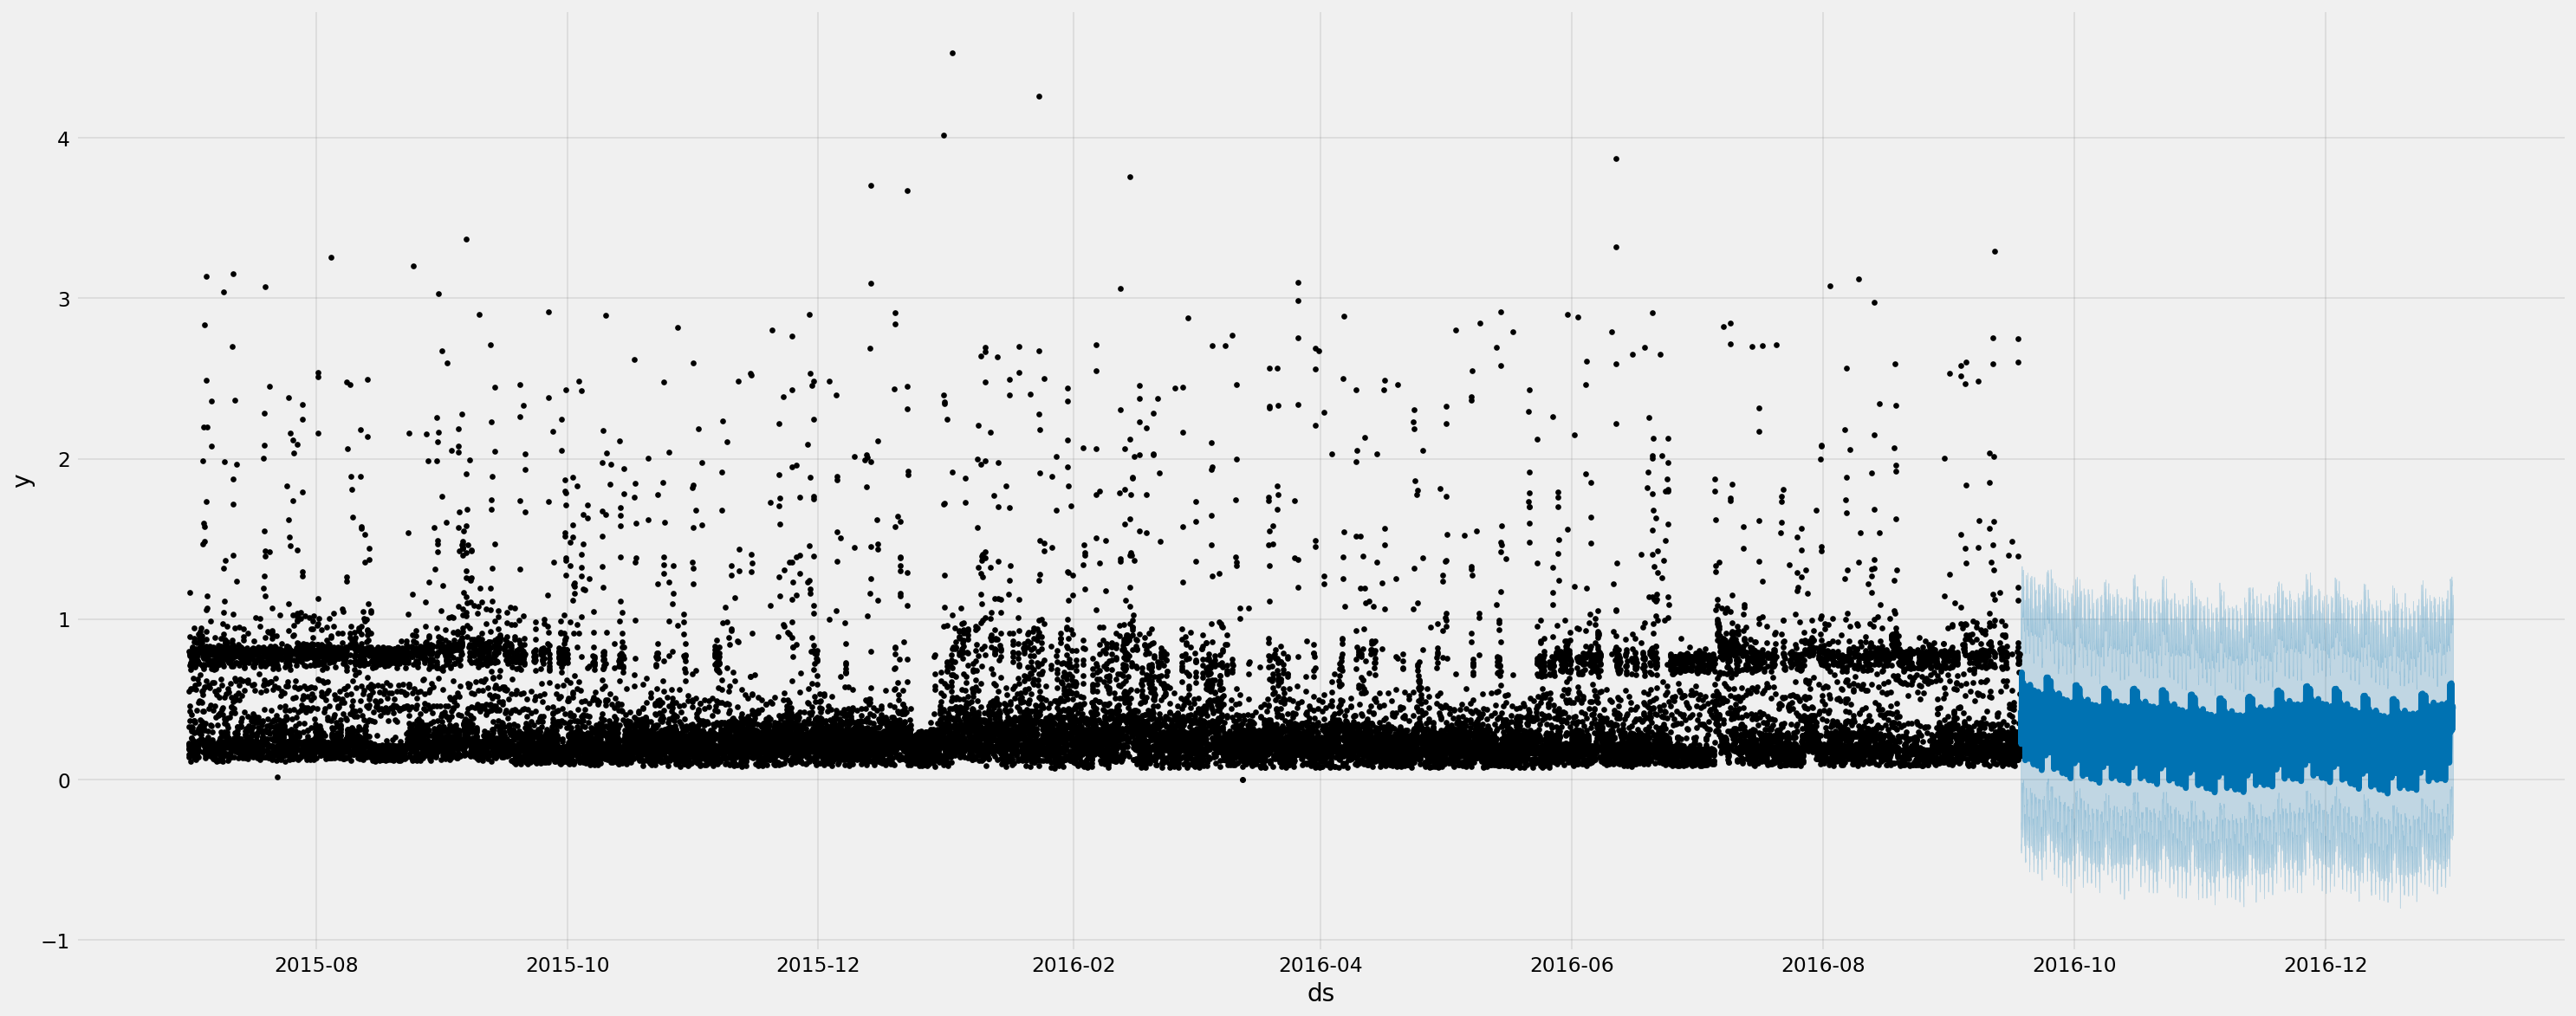

In [33]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(10)
f.set_figwidth(25)
fig = model.plot(prediction,
                 ax=ax)
plt.show()

### Using XGBoost for Time Series data

In [182]:
import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

import os
import re
from colorama import Fore, Back, Style
import seaborn as sns
import plotly.express as px
from matplotlib.patches import Patch

plt.rcParams.update({'figure.max_open_warning': 0})
plt.style.use('fivethirtyeight')
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm
import warnings
warnings.filterwarnings('ignore')

In [183]:
split_date = "2016-09-18"
home_train = home_a.loc[home_a.index <=split_date].copy()
home_test = home_a.loc[home_a.index >split_date].copy()

In [184]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index.
    """
    df = df.copy()
    cols= df.columns
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['night'] = np.where((df['hour']>=18)| (df['hour']<6),1,0)
    df['lag_hour'] = df['total'].shift(periods=2)
    df['lag_day'] = df['total'].shift(periods=48)
    df['lag_week'] = df['total'].shift(periods=336)
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth', 'night', 'lag_hour','lag_day','lag_week']]
    if label:
        y = df[label]
        return X, y
    return X, cols


In [185]:
X_train, y_train = create_features(home_train, label="total")
X_test, y_test = create_features(home_test, label="total")

In [187]:
X,y = create_features(home_a, label='total')

In [188]:
reg = xgb.XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}


In [189]:
xgb_grid = GridSearchCV(reg,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

In [190]:
X=X.reset_index()
X.drop("Date & Time", axis=1,inplace=True)

In [191]:
X=X.values

In [192]:
len(X)*0.3

7920.299999999999

In [193]:
tscv = TimeSeriesSplit(n_splits=5,
    gap=48,
    max_train_size=10000,
    test_size=1000)


In [194]:
def plot_cv_indices(cv, n_splits, X, y, date_col = None):
    """Create a sample plot for indices of a cross-validation object."""
    
    fig, ax = plt.subplots(1, 1, figsize = (11, 7))
    
    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(range(len(indices)), [ii + .5] * len(indices),
                   c=indices, marker='_', lw=10, cmap=cmap_cv,
                   vmin=-.2, vmax=1.2)


    # Formatting
    yticklabels = list(range(n_splits))
    
    if date_col is not None:
        tick_locations  = ax.get_xticks()
        tick_dates = [" "] + date_col.iloc[list(tick_locations[1:-1])].astype(str).tolist() + [" "]

        tick_locations_str = [str(int(i)) for i in tick_locations]
        new_labels = ['\n\n'.join(x) for x in zip(list(tick_locations_str), tick_dates) ]
        ax.set_xticks(tick_locations)
        ax.set_xticklabels(new_labels)
    
    ax.set(yticks=np.arange(n_splits+2) + .5, yticklabels=yticklabels,
           xlabel='Sample index', ylabel="CV iteration",
           ylim=[n_splits+0.2, -.2])
    ax.legend([Patch(color=cmap_cv(.8)), Patch(color=cmap_cv(.02))],
              ['Testing set', 'Training set'], loc=(1.02, .8))
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)

In [195]:
def evaluate(model, X, y, cv):
    cv_results = cross_validate(
        model,
        X,
        y,
        cv=cv,
        scoring=["neg_mean_absolute_error", "neg_root_mean_squared_error"],
    )
    mae = -cv_results["test_neg_mean_absolute_error"]
    rmse = -cv_results["test_neg_root_mean_squared_error"]
    print(
        f"Mean Absolute Error:     {mae.mean():.3f} +/- {mae.std():.3f}\n"
        f"Root Mean Squared Error: {rmse.mean():.3f} +/- {rmse.std():.3f}"
    )


evaluate(xgb_grid, X, y, cv=tscv)


Fitting 2 folds for each of 9 candidates, totalling 18 fits
[16:04:43] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[16:04:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:04:43] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[16:04:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to

KeyboardInterrupt: 

In [90]:
xgb_grid

GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n...
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    val

In [48]:

for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    xgb_grid.fit(
        X_train, y_train,eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=True)
    


Fitting 2 folds for each of 9 candidates, totalling 18 fits
[22:30:55] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[22:30:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:30:55] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[22:30:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to

In [254]:
xgb_grid.n_splits_

2

In [112]:
xgb_grid.fit(X_train,y_train, eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=True)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[17:35:16] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[17:35:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:35:16] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[17:35:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to

GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n...
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    val

In [56]:
len(home_train)

3792

In [53]:
home_test['prediction'] = xgb_grid.predict(X_test)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
home_all= pd.concat([home_train, home_test], sort=False)

In [135]:
_=home_all.loc[home_all.index>'2014-11-01'][['total','prediction']].plot(figsize=(15,10), lw=0.5)

NameError: name 'home_all' is not defined

### Using LSTMs 

In [161]:
# Convert to numpy arrays after preprocessing

energy= home_a['total_transformed'].values
energy = energy.reshape(len(energy),1)
energy= energy.astype('float32')
print(energy.shape)
energy

(26401, 1)


array([[0.17305957],
       [0.1410387 ],
       [0.12712334],
       ...,
       [0.149959  ],
       [0.12148874],
       [0.13692571]], dtype=float32)

In [162]:
# Data partitining 
train_size  = int(len(energy) * 0.80)
test_size   = len(energy) - train_size
train, test = energy[:train_size], energy[train_size:]

In [163]:
# Scaling the data to the interval [0,1]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(train)

train = scaler.transform(train)
test  = scaler.transform(test)

In [164]:
def create_dataset(time_series, timesteps):
    dataX, dataY = [], []
    
    for i in range(0, len(time_series)-timesteps ): # The last 
        x = time_series[i:(i+timesteps)]    ####### Remember Python's x[a, b-1]
        dataX.append(x)
        y = time_series[(i+timesteps)]      ##### Remember Python's x[b]
        dataY.append(y)
           
    return np.array(dataX), np.array(dataY) #dont forget to convert to np.arrays

/Users/daniel.bustillo/opt/anaconda3/envs/thesis/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


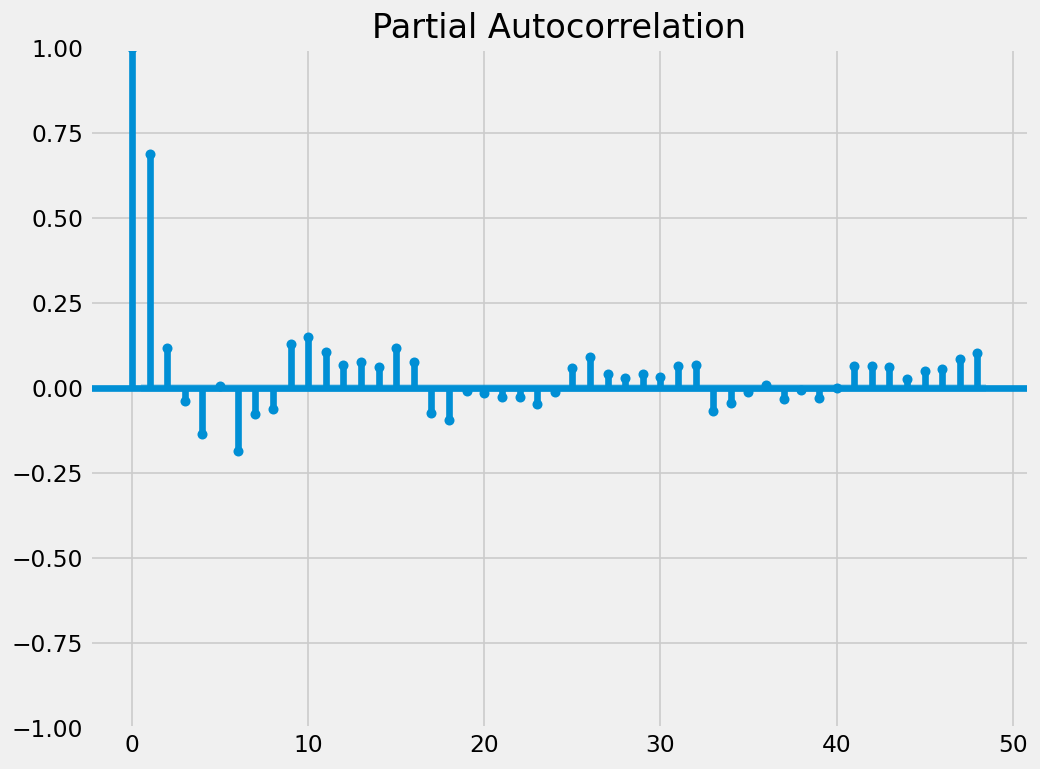

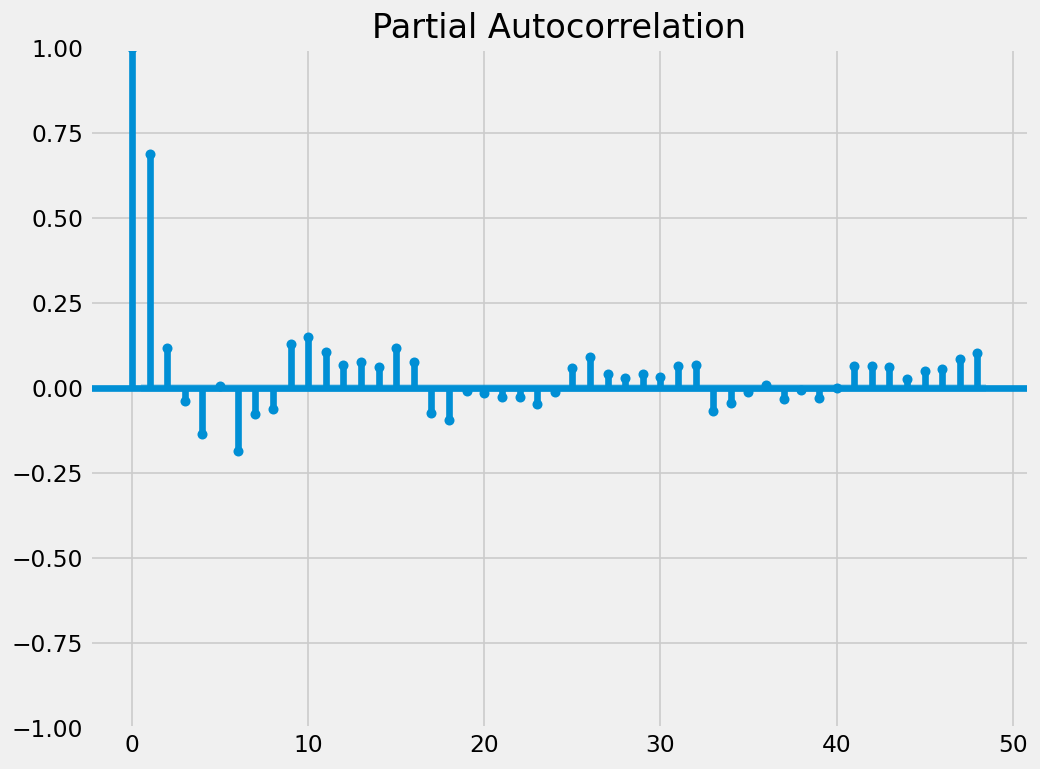

In [165]:
plot_pacf(energy,lags=48)

In [166]:
timesteps = 8 # parameter to tune, timesteps

# The LSTM input layer must be 3D
# Create the dataset with rolling window for the training set and test set
X_train, y_train  = create_dataset(train, timesteps)  # lookback
X_test, y_test    = create_dataset(test, timesteps)
X_train.shape

(21112, 8, 1)

In [167]:
X_train

array([[[0.67050856],
        [0.5464457 ],
        [0.4925315 ],
        ...,
        [0.39374417],
        [0.52717775],
        [0.5006023 ]],

       [[0.5464457 ],
        [0.4925315 ],
        [0.43494985],
        ...,
        [0.52717775],
        [0.5006023 ],
        [0.8167368 ]],

       [[0.4925315 ],
        [0.43494985],
        [0.543208  ],
        ...,
        [0.5006023 ],
        [0.8167368 ],
        [0.8980161 ]],

       ...,

       [[0.53831565],
        [0.5189348 ],
        [0.43675148],
        ...,
        [0.42253667],
        [0.5549386 ],
        [0.65626884]],

       [[0.5189348 ],
        [0.43675148],
        [0.62443143],
        ...,
        [0.5549386 ],
        [0.65626884],
        [0.6247063 ]],

       [[0.43675148],
        [0.62443143],
        [0.49799317],
        ...,
        [0.65626884],
        [0.6247063 ],
        [0.9510345 ]]], dtype=float32)

In [168]:
from keras.preprocessing.sequence import TimeseriesGenerator

# Create input data from time series
demo = TimeseriesGenerator(train, train, length = timesteps, sampling_rate=1, batch_size=1)
print('Length of the output is {}.'.format(len(demo)))

# As result, we get a set of tuples (x, y) which we can enumerate and index
demo_x0 = demo[0][0]
demo_y0 = demo[0][1]
print(demo_x0)
print(X_train[0])   # Compare that to the above

# Likewise
print(demo_y0)
print(y_train[0])

# Here is an example to transform the output of TimeseriesGenerator to match the structure of X_train
demo_x = np.asarray([x[0] for x in demo])
print('Shape of demo_x {}'.format(demo_x.shape))
demo_x = np.reshape(demo_x, (len(demo), timesteps, 1))

# Confirm the two data structures are equivalent
print('Difference of the two data containers should be zero and evaluates to {}'.format(
    np.sum(demo_x - X_train)))

Length of the output is 21112.
[[[0.67050856]
  [0.5464457 ]
  [0.4925315 ]
  [0.43494985]
  [0.543208  ]
  [0.39374417]
  [0.52717775]
  [0.5006023 ]]]
[[0.67050856]
 [0.5464457 ]
 [0.4925315 ]
 [0.43494985]
 [0.543208  ]
 [0.39374417]
 [0.52717775]
 [0.5006023 ]]
[[0.8167368]]
[0.8167368]
Shape of demo_x (21112, 1, 8, 1)
Difference of the two data containers should be zero and evaluates to 0.0


In [169]:
# Reshape input to be [obs, time steps, features]

X_train  = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test   = np.reshape(X_test,  (X_test.shape[0],  X_test.shape[1],  1))
print(X_train.shape,y_train.shape, X_test.shape,y_test.shape)

(21112, 8, 1) (21112, 1) (5273, 8, 1) (5273, 1)


#### Evaluation and Benchmark

In [170]:
from sklearn.metrics import mean_squared_error
def rmse(y_true, y_score):
    error = np.sqrt(mean_squared_error(y_true=y_true, y_pred=y_score))
    return error

In [171]:
rmse_train = {}
rmse_test = {}

p=1 RMSE:0.14335
p=2 RMSE:0.16948
p=3 RMSE:0.19057
p=4 RMSE:0.21362
p=5 RMSE:0.22541
p=6 RMSE:0.24221
p=7 RMSE:0.25518
p=8 RMSE:0.26357
p=9 RMSE:0.25899
p=10 RMSE:0.25270
p=11 RMSE:0.24329
p=12 RMSE:0.23575
p=13 RMSE:0.22638
p=14 RMSE:0.21837
p=15 RMSE:0.20512
p=16 RMSE:0.19898
p=17 RMSE:0.20642
p=18 RMSE:0.21701
p=19 RMSE:0.22542
p=20 RMSE:0.23301
p=21 RMSE:0.24069
p=22 RMSE:0.25010
p=23 RMSE:0.25883
p=24 RMSE:0.26306
p=25 RMSE:0.25937
p=26 RMSE:0.25045
p=27 RMSE:0.24399
p=28 RMSE:0.23573
p=29 RMSE:0.22820
p=30 RMSE:0.22255
p=31 RMSE:0.21237
p=32 RMSE:0.20743
p=33 RMSE:0.21764
p=34 RMSE:0.22440
p=35 RMSE:0.23425
p=36 RMSE:0.24132
p=37 RMSE:0.24792
p=38 RMSE:0.25718
p=39 RMSE:0.26392
p=40 RMSE:0.26671
p=41 RMSE:0.26134
p=42 RMSE:0.25292
p=43 RMSE:0.24311
p=44 RMSE:0.23449
p=45 RMSE:0.22390
p=46 RMSE:0.21257
p=47 RMSE:0.20156
p=48 RMSE:0.19416
p=49 RMSE:0.20231
p=50 RMSE:0.21442
p=51 RMSE:0.22391
p=52 RMSE:0.23336
p=53 RMSE:0.24166
p=54 RMSE:0.25284
p=55 RMSE:0.26256
p=56 RMSE:0.26696
p

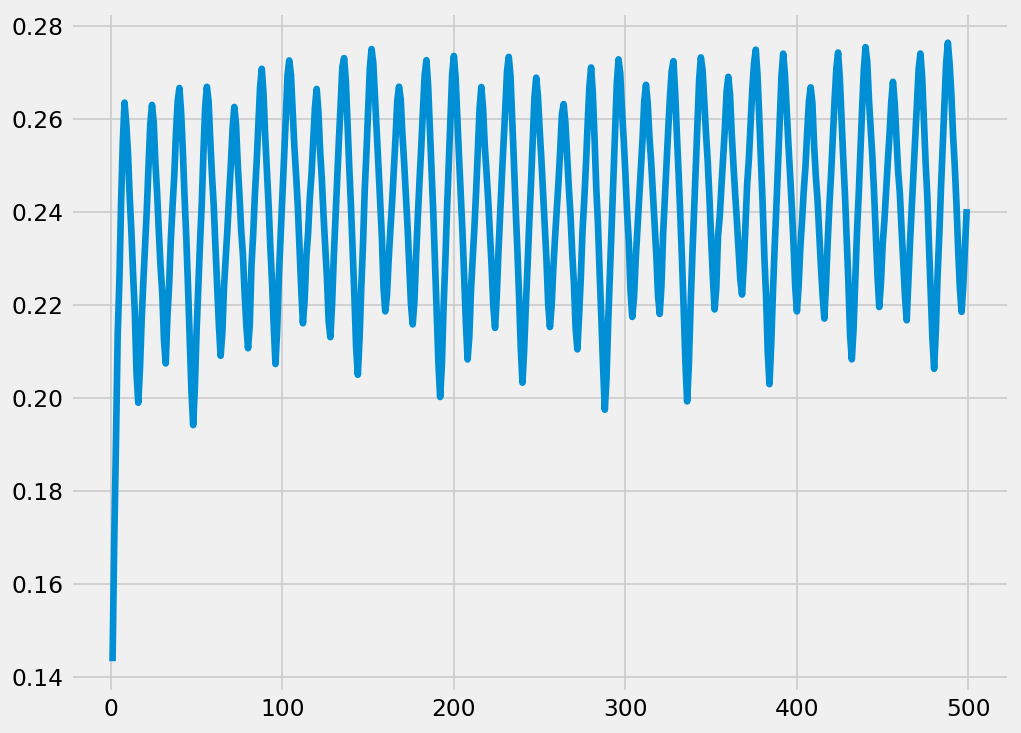

In [172]:
# Persistence code from machinelearningmastery.com/simple-time-series-forecasting-models/

persistence_values = range(1, 500) # how many days back (within a month) should we go as a forecast for tomorrow
scores = list()
for p in persistence_values:
    # walk-forward validation
    history = [x for x in train]
    predictions = list()
    for i in range(len(test)):
    # make prediction
        yhat = history[-p]
        predictions.append(yhat)
    # observation
        history.append(test[i])
    # report performance
    error = rmse(test, predictions)
    scores.append(error)
    print('p=%d RMSE:%.5f' % (p, error))
# plot scores over persistence values
plt.plot(persistence_values, scores)
plt.show()

In [173]:
# Lag for the naive benchmark (i.e., persistence forecast)
k_naive = 1
# Since the persistenc forecasts looks at a past value of the time series, it is convenient to use the Pandas function shift()
# for calculating the benchmark. So we first collect the actual time series in a data frame,
pred_naive = pd.DataFrame(np.vstack([y_train, y_test]))
# and then use shift with our selected lag k_naive, while filling up NaN values at the beginning of the time series with the mean.
# Since we will never use the start of the time series (i.e., first samples in the training set) for testing, the mean replacement does 
# not affect subsequent results. 
pred_naive = pred_naive.shift(periods=k_naive, axis=0, fill_value=np.mean(y_train)).values

In [174]:
# We use one dictionary for the training and one for the test data
pred_test = {}
pred_train = {}

# We store the actual price differences as opposed to their scaled version
pred_train["true"] = scaler.inverse_transform(y_train).flatten()  # store as 1d array
pred_test["true"]  = scaler.inverse_transform(y_test).flatten() 

# Also add the lagged persistence forecast
pred_train["naive"] = scaler.inverse_transform(pred_naive[:len(y_train), :]).flatten()  # This is a good example of why the [a, b-1] 
pred_test["naive"]  = scaler.inverse_transform(pred_naive[len(y_train):, :]).flatten()  # indexing is convenient

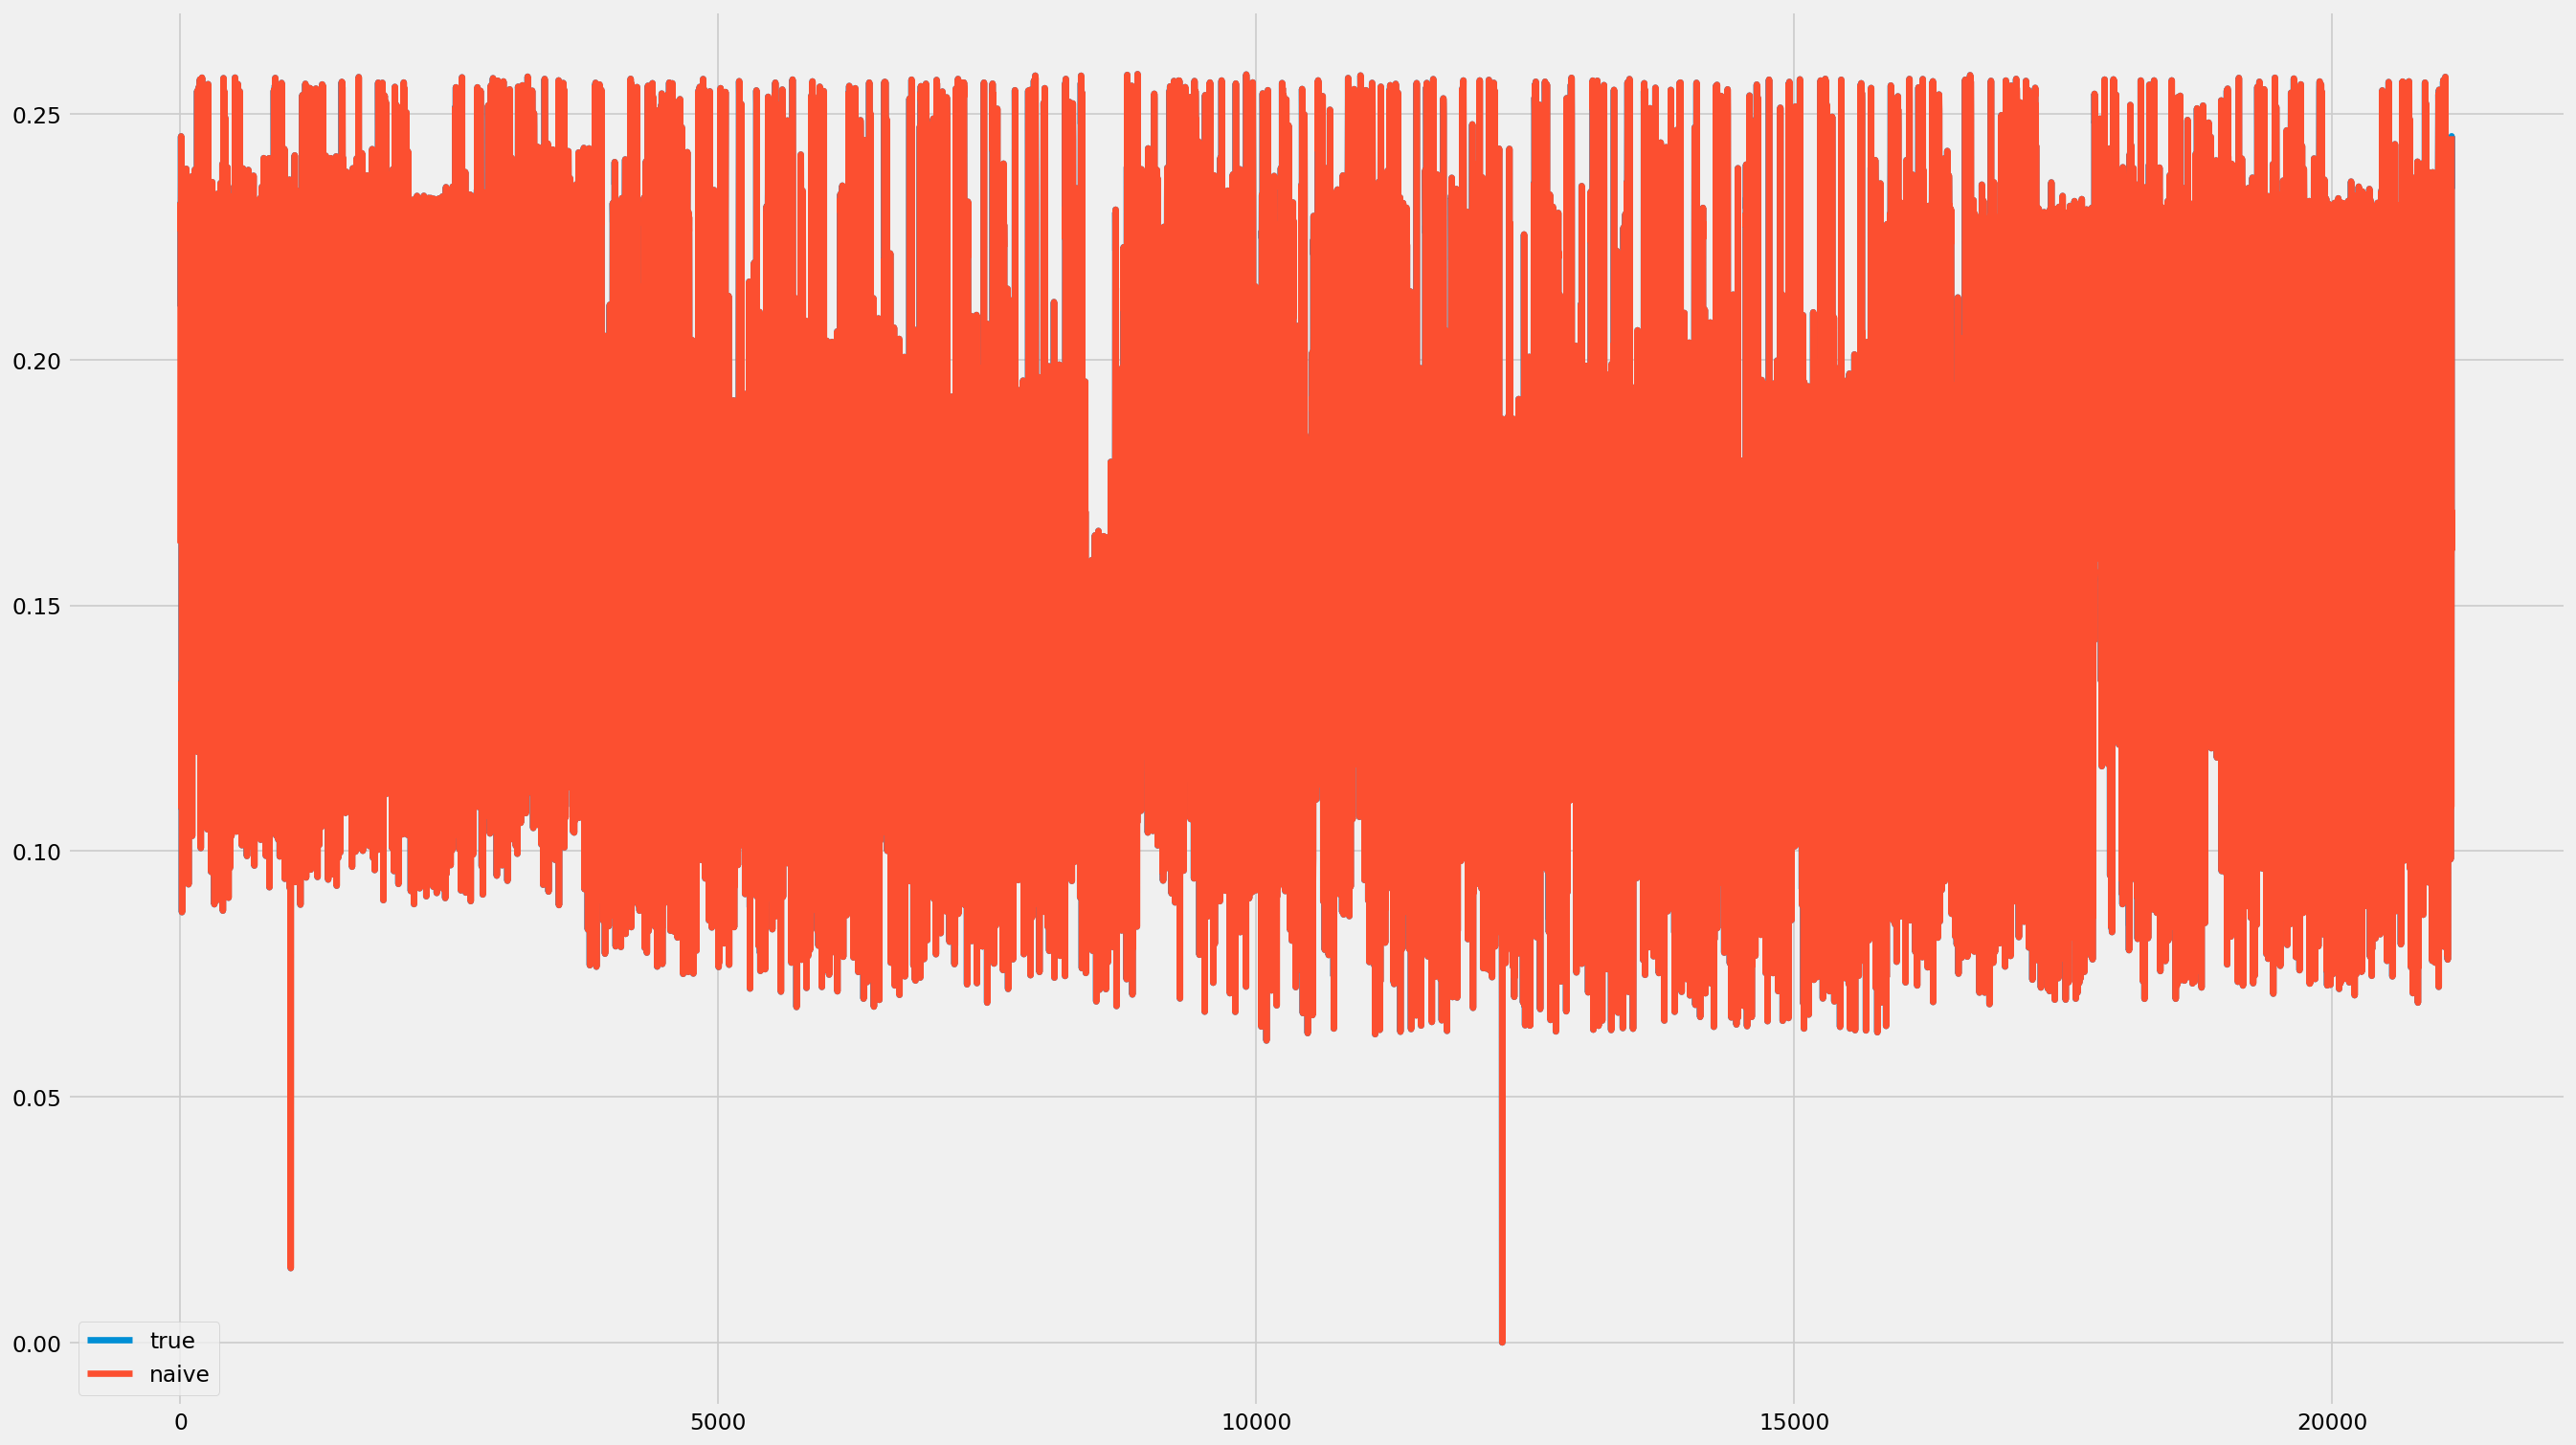

In [175]:
pd.DataFrame(pred_train).plot(figsize=(25,15))
plt.show()

In [176]:
rmse_train["naive"] = rmse(pred_train["true"], pred_train["naive"])
rmse_test["naive"]  = rmse(pred_test["true"],  pred_test["naive"])

rmse_test

{'naive': 0.036981102}

In [177]:
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [178]:
# Define the model
batch_size = 32 # An arbitrary choice
stateless = Sequential()
stateless.add(LSTM(7))  # size of the LSTM hidden state, we select 7 units; also arbitrary 
stateless.add(Dense(1))
stateless.compile(loss = 'mean_squared_error', optimizer = "adam", metrics=['mse'])

# Training
stateless.fit(X_train, y_train, batch_size=batch_size, epochs=30, validation_split=0.3, verbose=1)
stateless.summary()

Epoch 1/30
462/462 [==============================] - 5s 6ms/step - loss: 0.0424 - mse: 0.0424 - val_loss: 0.0291 - val_mse: 0.0291
Epoch 2/30
462/462 [==============================] - 2s 5ms/step - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0207 - val_mse: 0.0207
Epoch 3/30
462/462 [==============================] - 2s 5ms/step - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0183 - val_mse: 0.0183
Epoch 4/30
462/462 [==============================] - 3s 6ms/step - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0185 - val_mse: 0.0185
Epoch 5/30
462/462 [==============================] - 2s 5ms/step - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0180 - val_mse: 0.0180
Epoch 6/30
462/462 [==============================] - 2s 5ms/step - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0179 - val_mse: 0.0179
Epoch 7/30
462/462 [==============================] - 3s 6ms/step - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0180 - val_mse: 0.0180
Epoch 8/30
462/462 [==============================] - 3s 6ms/step - loss: 0.

In [179]:
# Input data for prediction as 3d array [samples / time steps / features]
stateless.predict(X_test[0].reshape(1, timesteps, 1))

array([[0.4923546]], dtype=float32)

In [180]:
#Compare to the test data
y_test[0]

array([0.5851111], dtype=float32)

In [181]:
# Define the model
demo = Sequential()
demo.add(LSTM(7, return_sequences=True))
demo.add(Dense(1))

demo.predict(X_test[0].reshape(-1, timesteps, 1))

array([[[0.00054878],
        [0.00097528],
        [0.00373437],
        [0.00916255],
        [0.0182392 ],
        [0.0277634 ],
        [0.03856831],
        [0.04580627]]], dtype=float32)

In [182]:
timesteps

8

In [183]:
# Silly (!) copying of y values to showcase how target values would need to be organized
tmp_y  = np.repeat(y_train, timesteps, axis=1).reshape(-1, timesteps, 1)
demo.compile(loss = 'mean_squared_error', optimizer = "adam", metrics=['mse'])
# Training
demo.fit(X_train, tmp_y, batch_size=batch_size, epochs=10, validation_split=0.3, verbose=0)

In [184]:
# Remember that we need to reverse the scaling. This is equivalent to the above code for the persistence benchmark
pred_train["stateless"] = scaler.inverse_transform(
                              stateless.predict(X_train,verbose=0)
).flatten()

pred_test["stateless"] = scaler.inverse_transform(
stateless.predict(X_test,verbose=0)
).flatten()

Train Score of stateless LSTM: 0.032024 RMSE
Test Score of stateless LSTM:  0.032128 RMSE


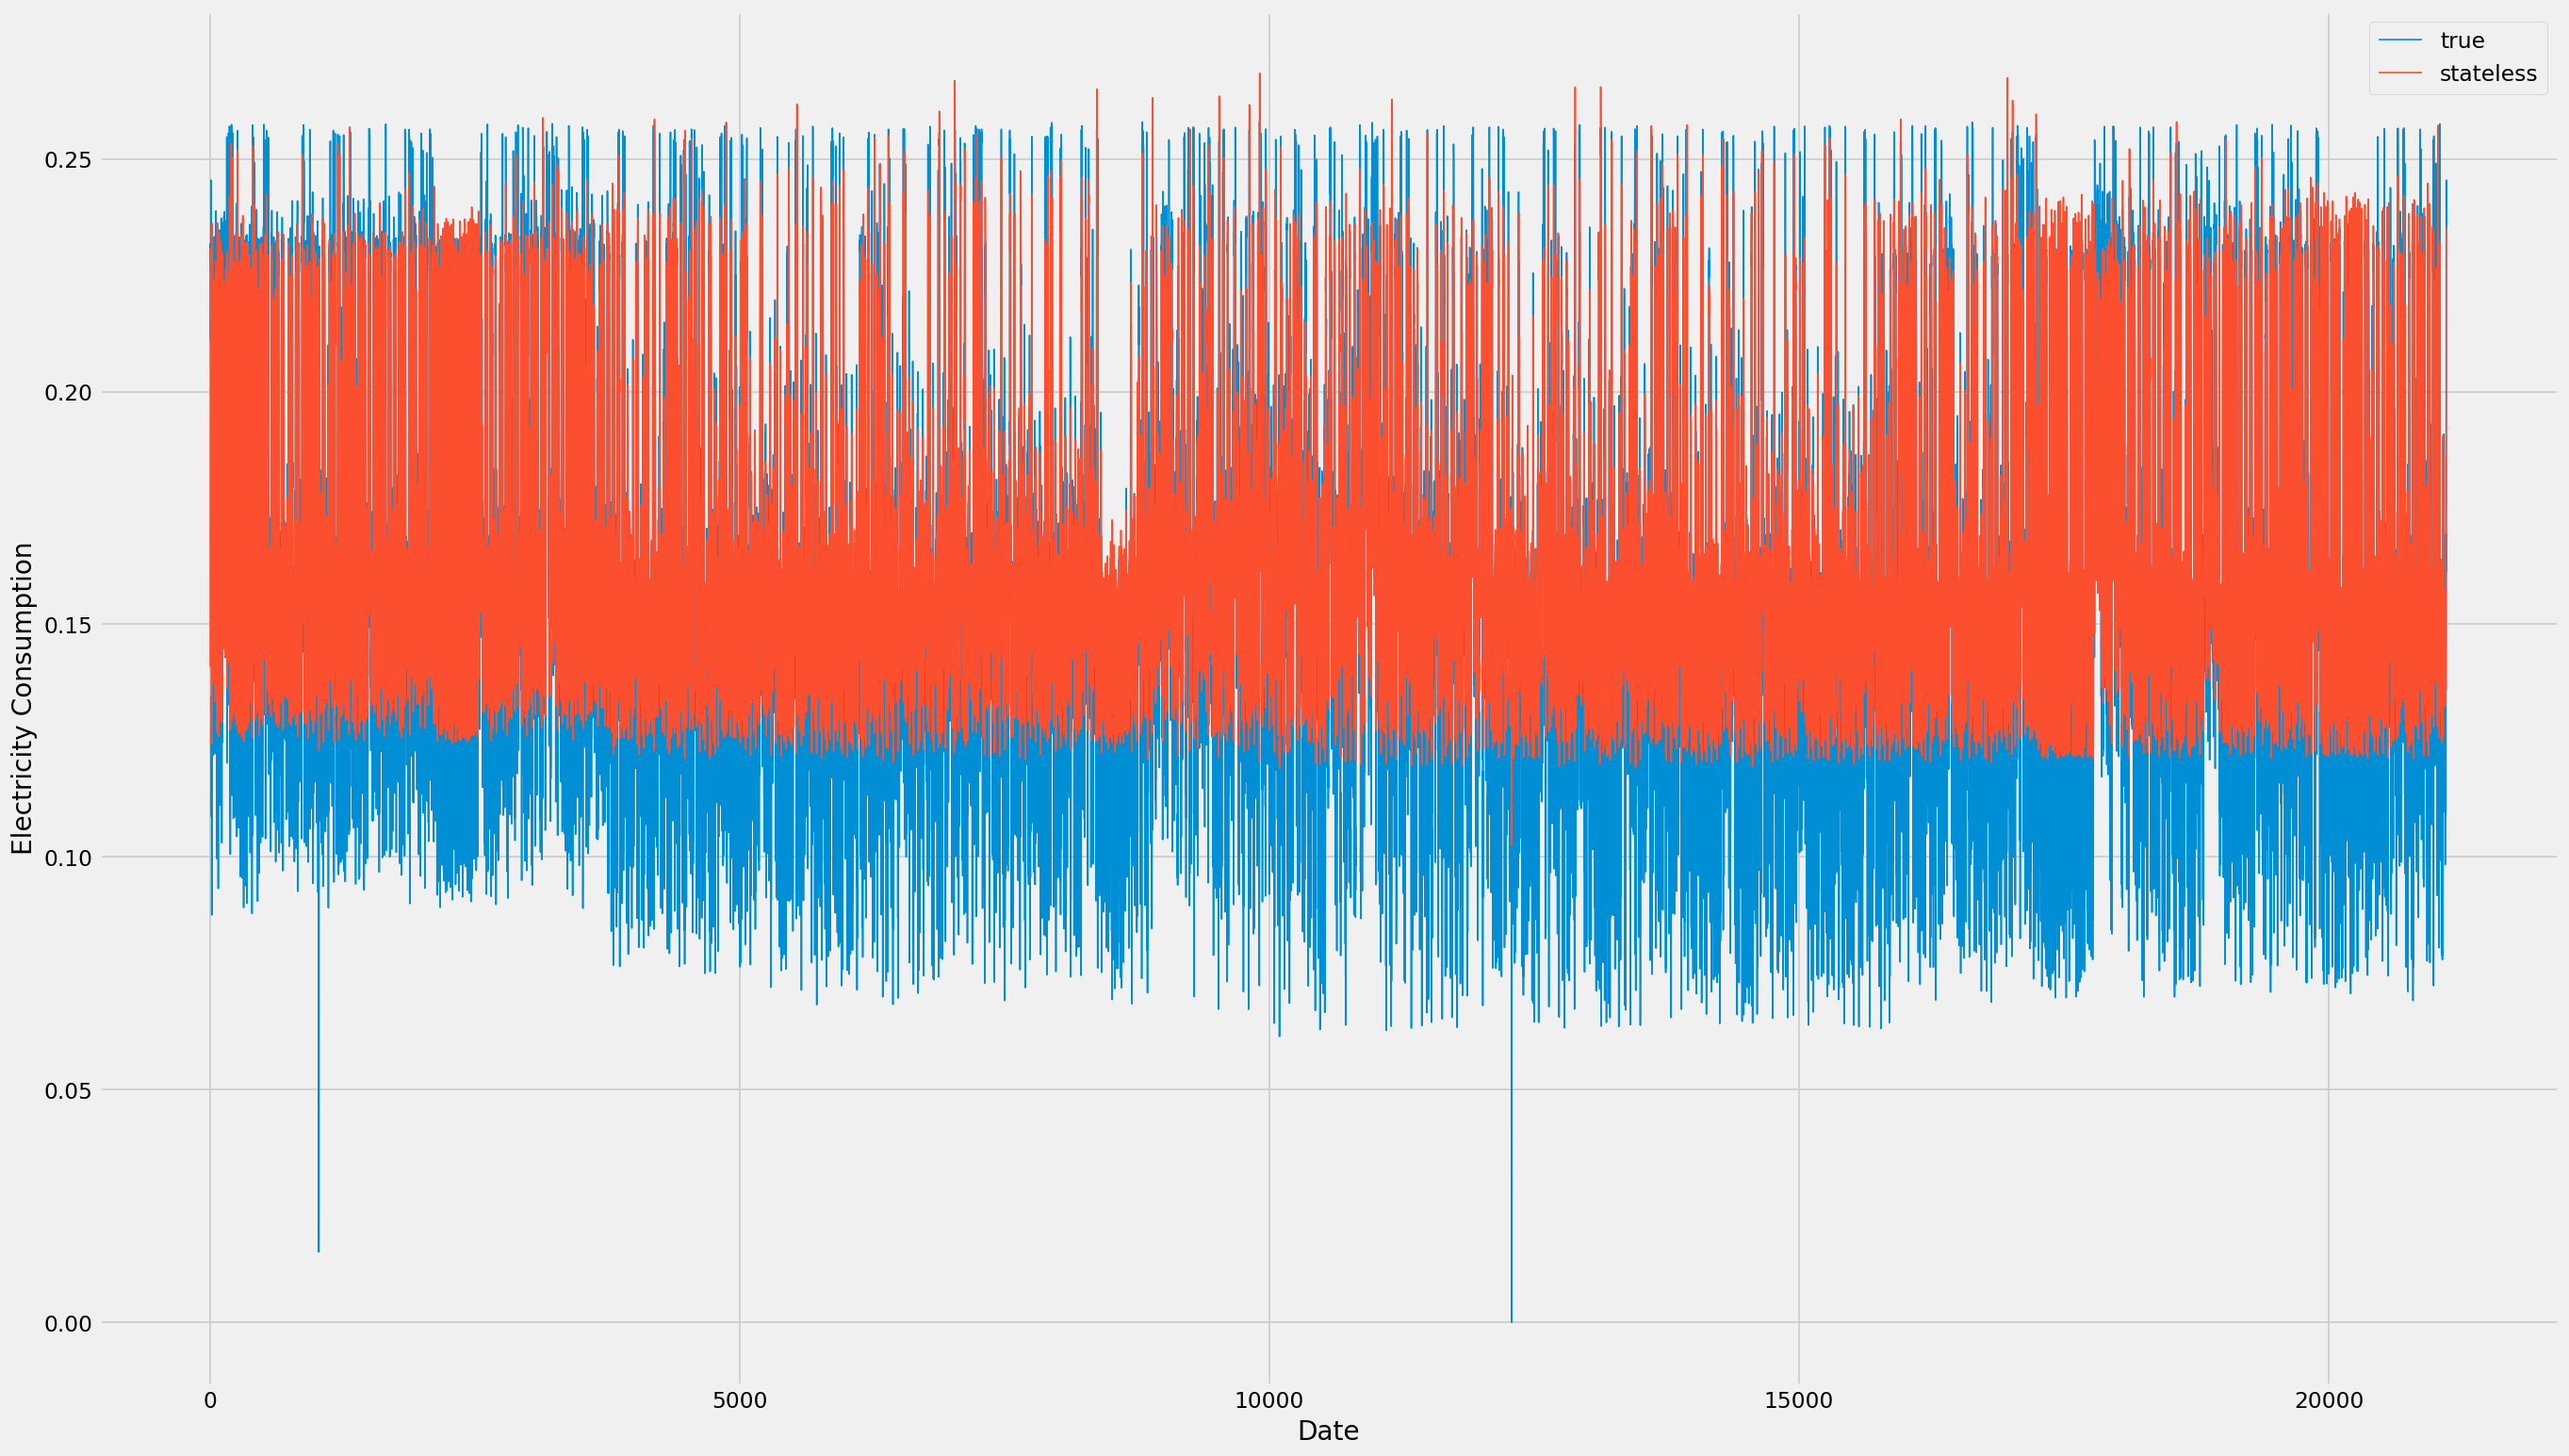

In [185]:
# Compute RMSE
rmse_train["stateless"] = rmse(pred_train["true"], pred_train["stateless"])
rmse_test["stateless"]  = rmse(pred_test["true"],  pred_test["stateless"])

print('Train Score of stateless LSTM: %.6f RMSE' % (rmse_train["stateless"]))
print('Test Score of stateless LSTM:  %.6f RMSE' % (rmse_test["stateless"]))

# Plot actuals and forecasts
pd.DataFrame(pred_train)[["true","stateless"]].plot(figsize=(25,15), lw=1)
plt.xlabel('Date')
plt.ylabel('Electricity Consumption')
plt.show()

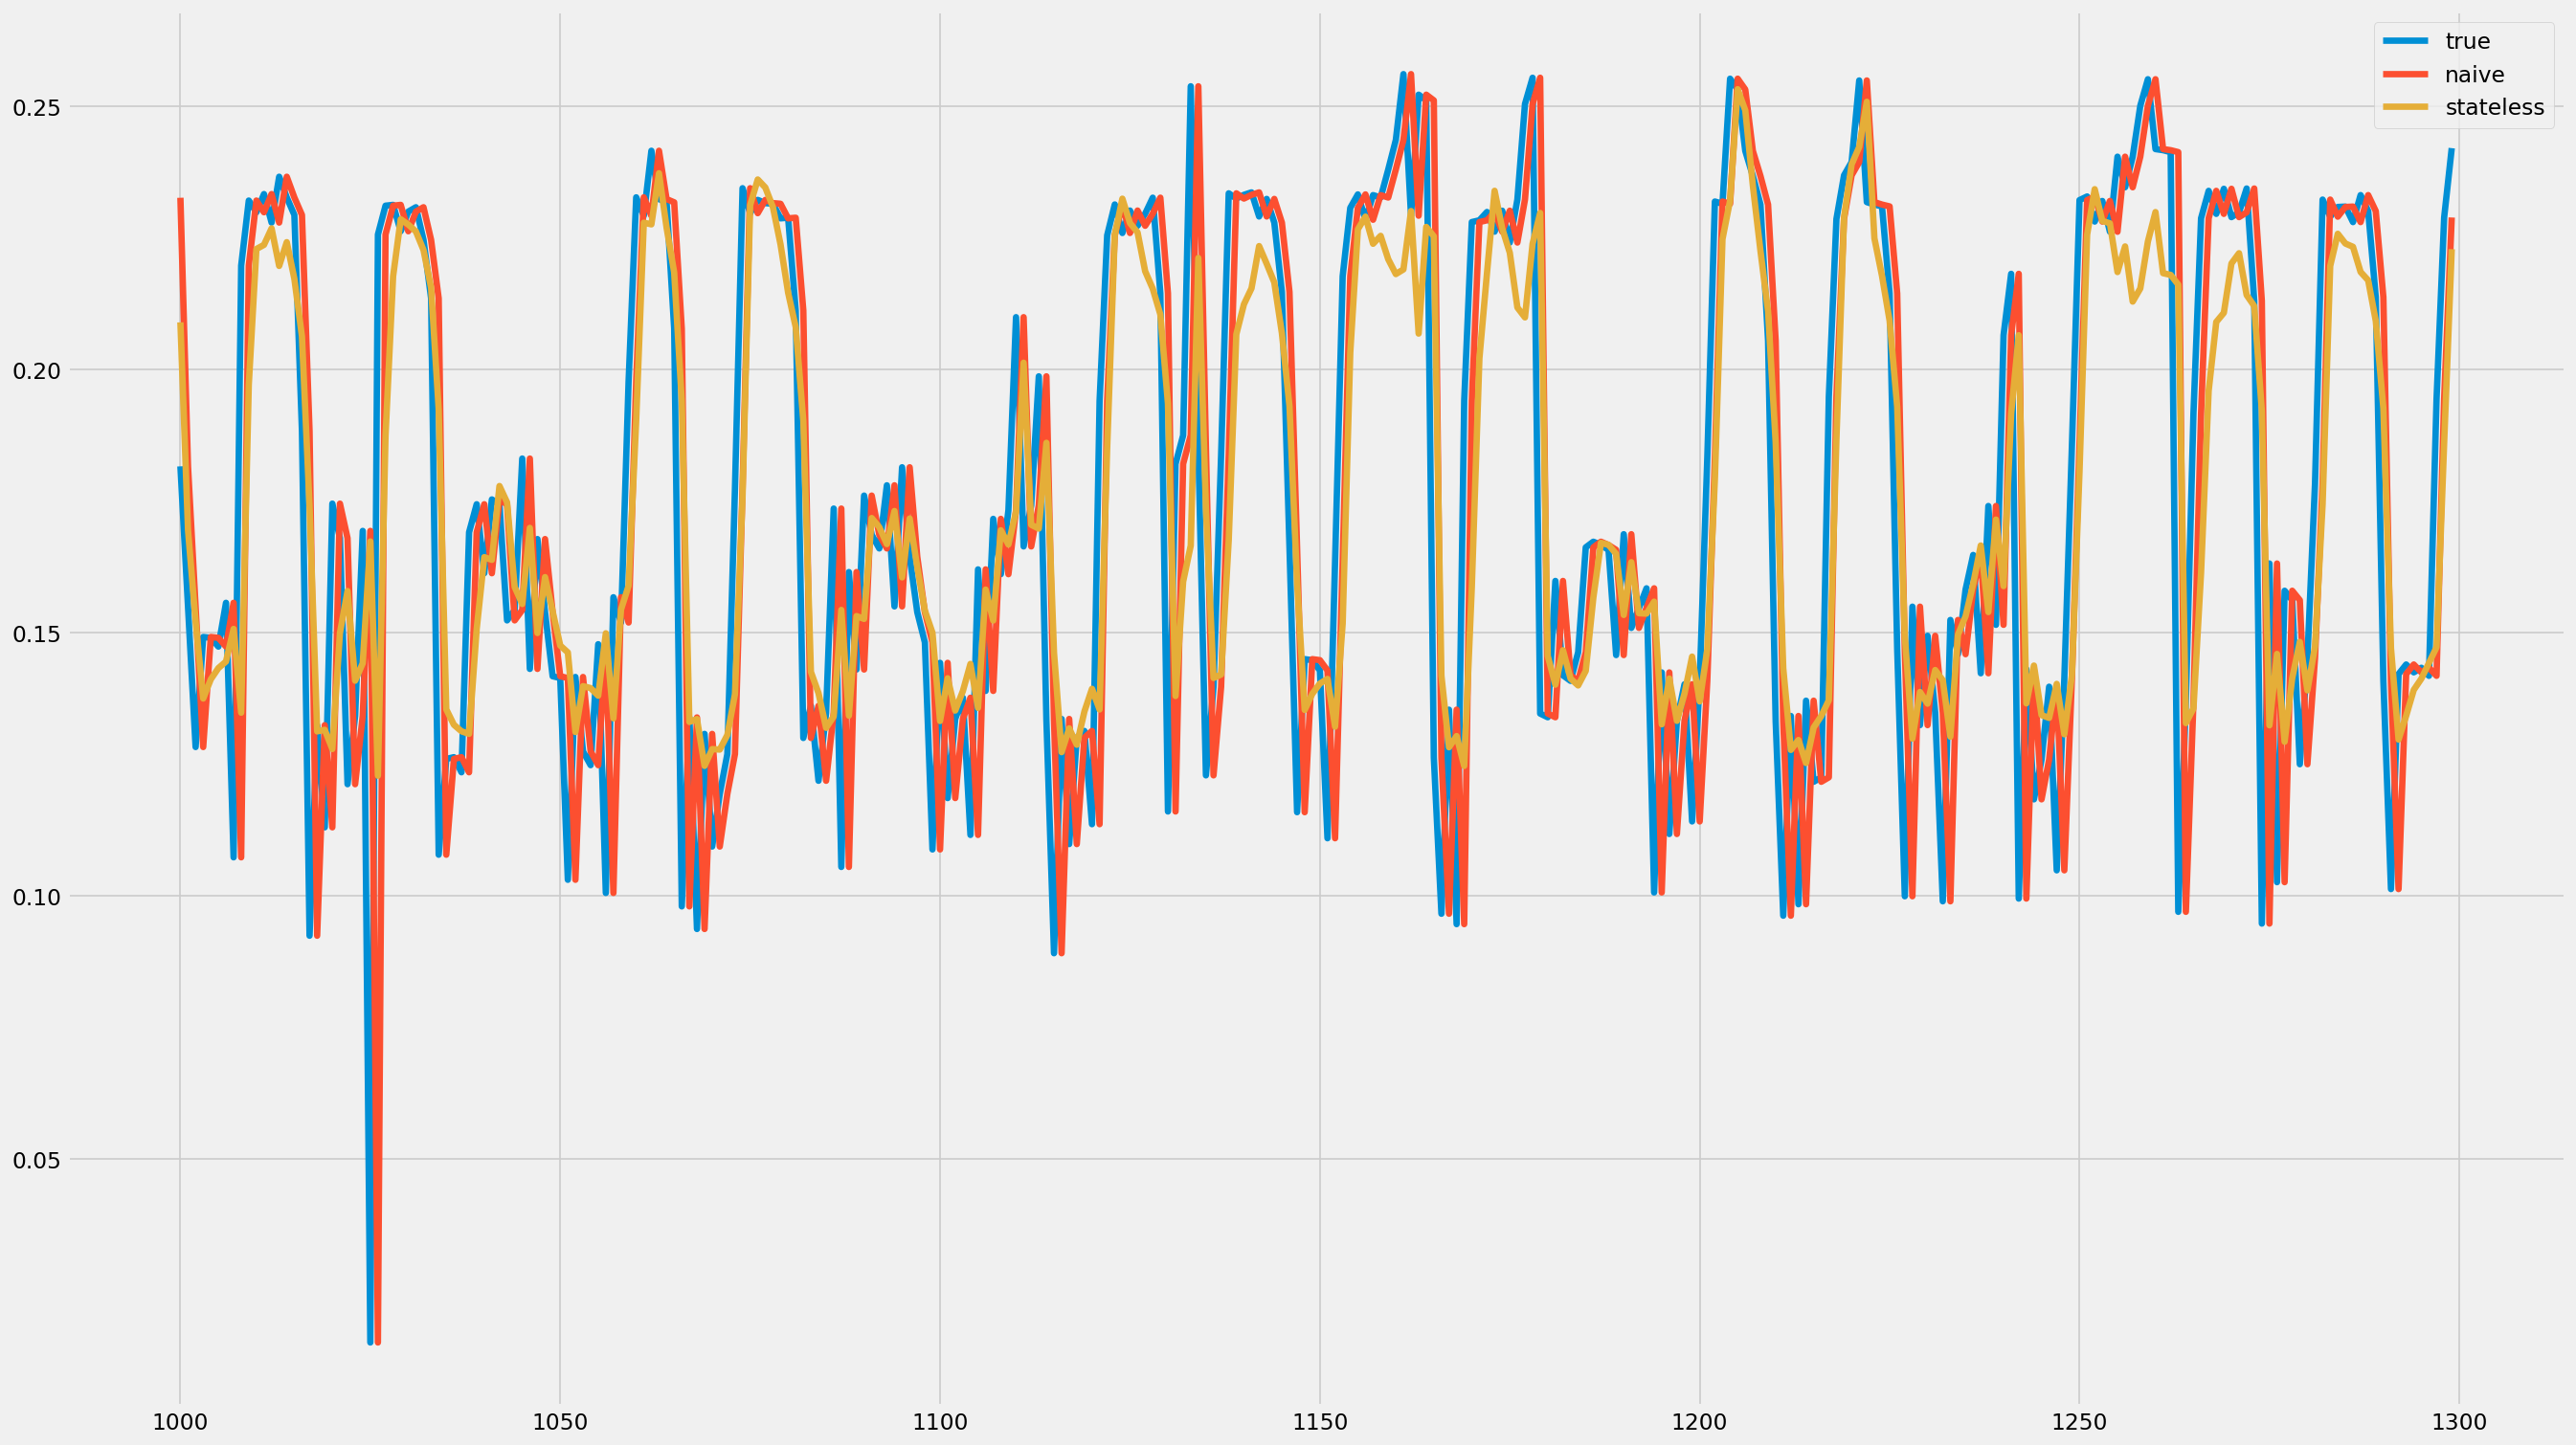

In [186]:
pd.DataFrame(pred_train).iloc[1000:1300,:].plot(figsize=(25,15));

In [251]:
pred_train

{'true': array([0.5480672 , 0.7985789 , 0.7146722 , ..., 0.2875178 , 1.1663002 ,
        0.85388833], dtype=float32),
 'naive': array([0.4038575 , 0.5480672 , 0.7985789 , ..., 0.31697333, 0.2875178 ,
        1.1663002 ], dtype=float32),
 'stateless': array([0.16271937, 0.5151102 , 0.6735498 , ..., 0.28566757, 0.2613935 ,
        0.97803396], dtype=float32)}

### Multiple layers

In [252]:
stateless_multilayer = Sequential()
stateless_multilayer.add(LSTM(7, return_sequences=True))
stateless_multilayer.add(Dropout(0.2))  # you can also add dropout layers if you like
stateless_multilayer.add(LSTM(7, return_sequences=False))
stateless_multilayer.add(Dropout(0.2))
stateless_multilayer.add(Dense(1))
stateless_multilayer.compile(loss = 'mean_squared_error', optimizer = "adam", metrics=['mse'])

In [253]:
y_train.shape

(21112, 1)

In [254]:
stateless_multilayer.fit(X_train, y_train, batch_size=batch_size,epochs=10, validation_split=0.3 )

Epoch 1/10
462/462 [==============================] - 9s 10ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 2/10
462/462 [==============================] - 4s 9ms/step - loss: 0.0055 - mse: 0.0055 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 3/10
462/462 [==============================] - 4s 9ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 4/10
462/462 [==============================] - 5s 10ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 5/10
462/462 [==============================] - 4s 9ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 6/10
462/462 [==============================] - 5s 10ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 7/10
462/462 [==============================] - 5s 10ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 8/10
462/462 [==============================] - 5s 10ms/step - los

Train Score: 0.285754 RMSE
Test Score: 0.268359 RMSE


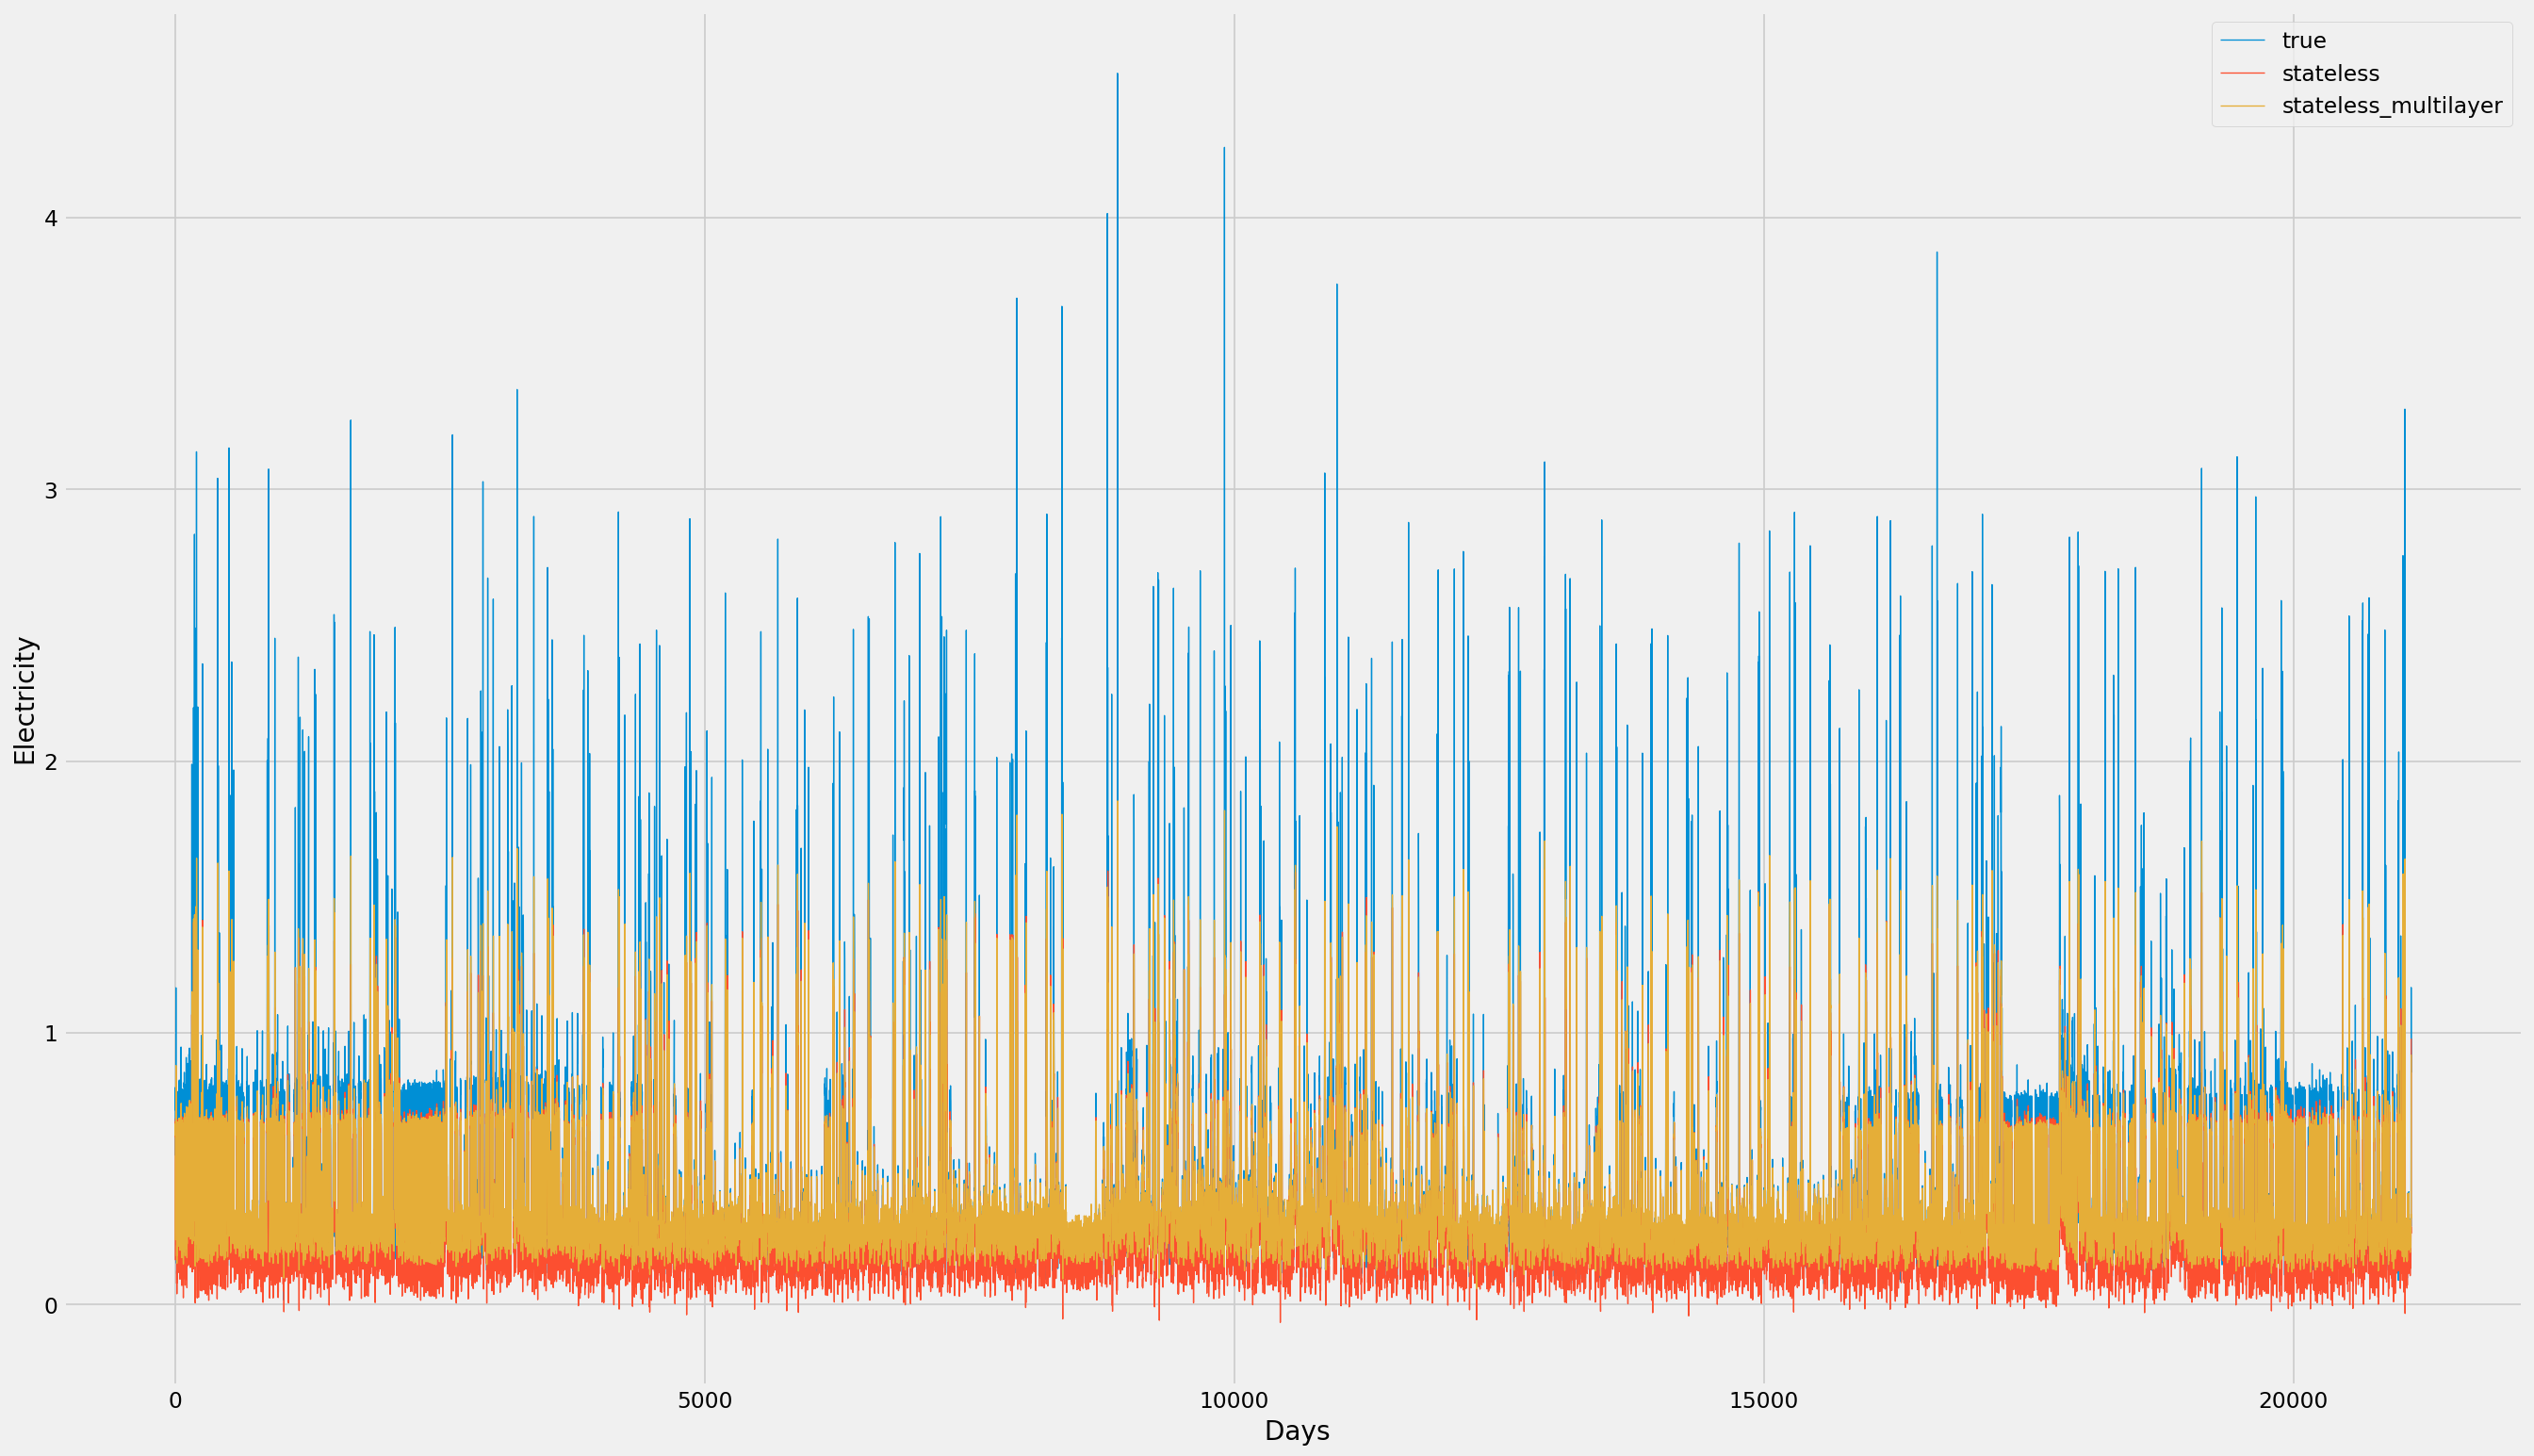

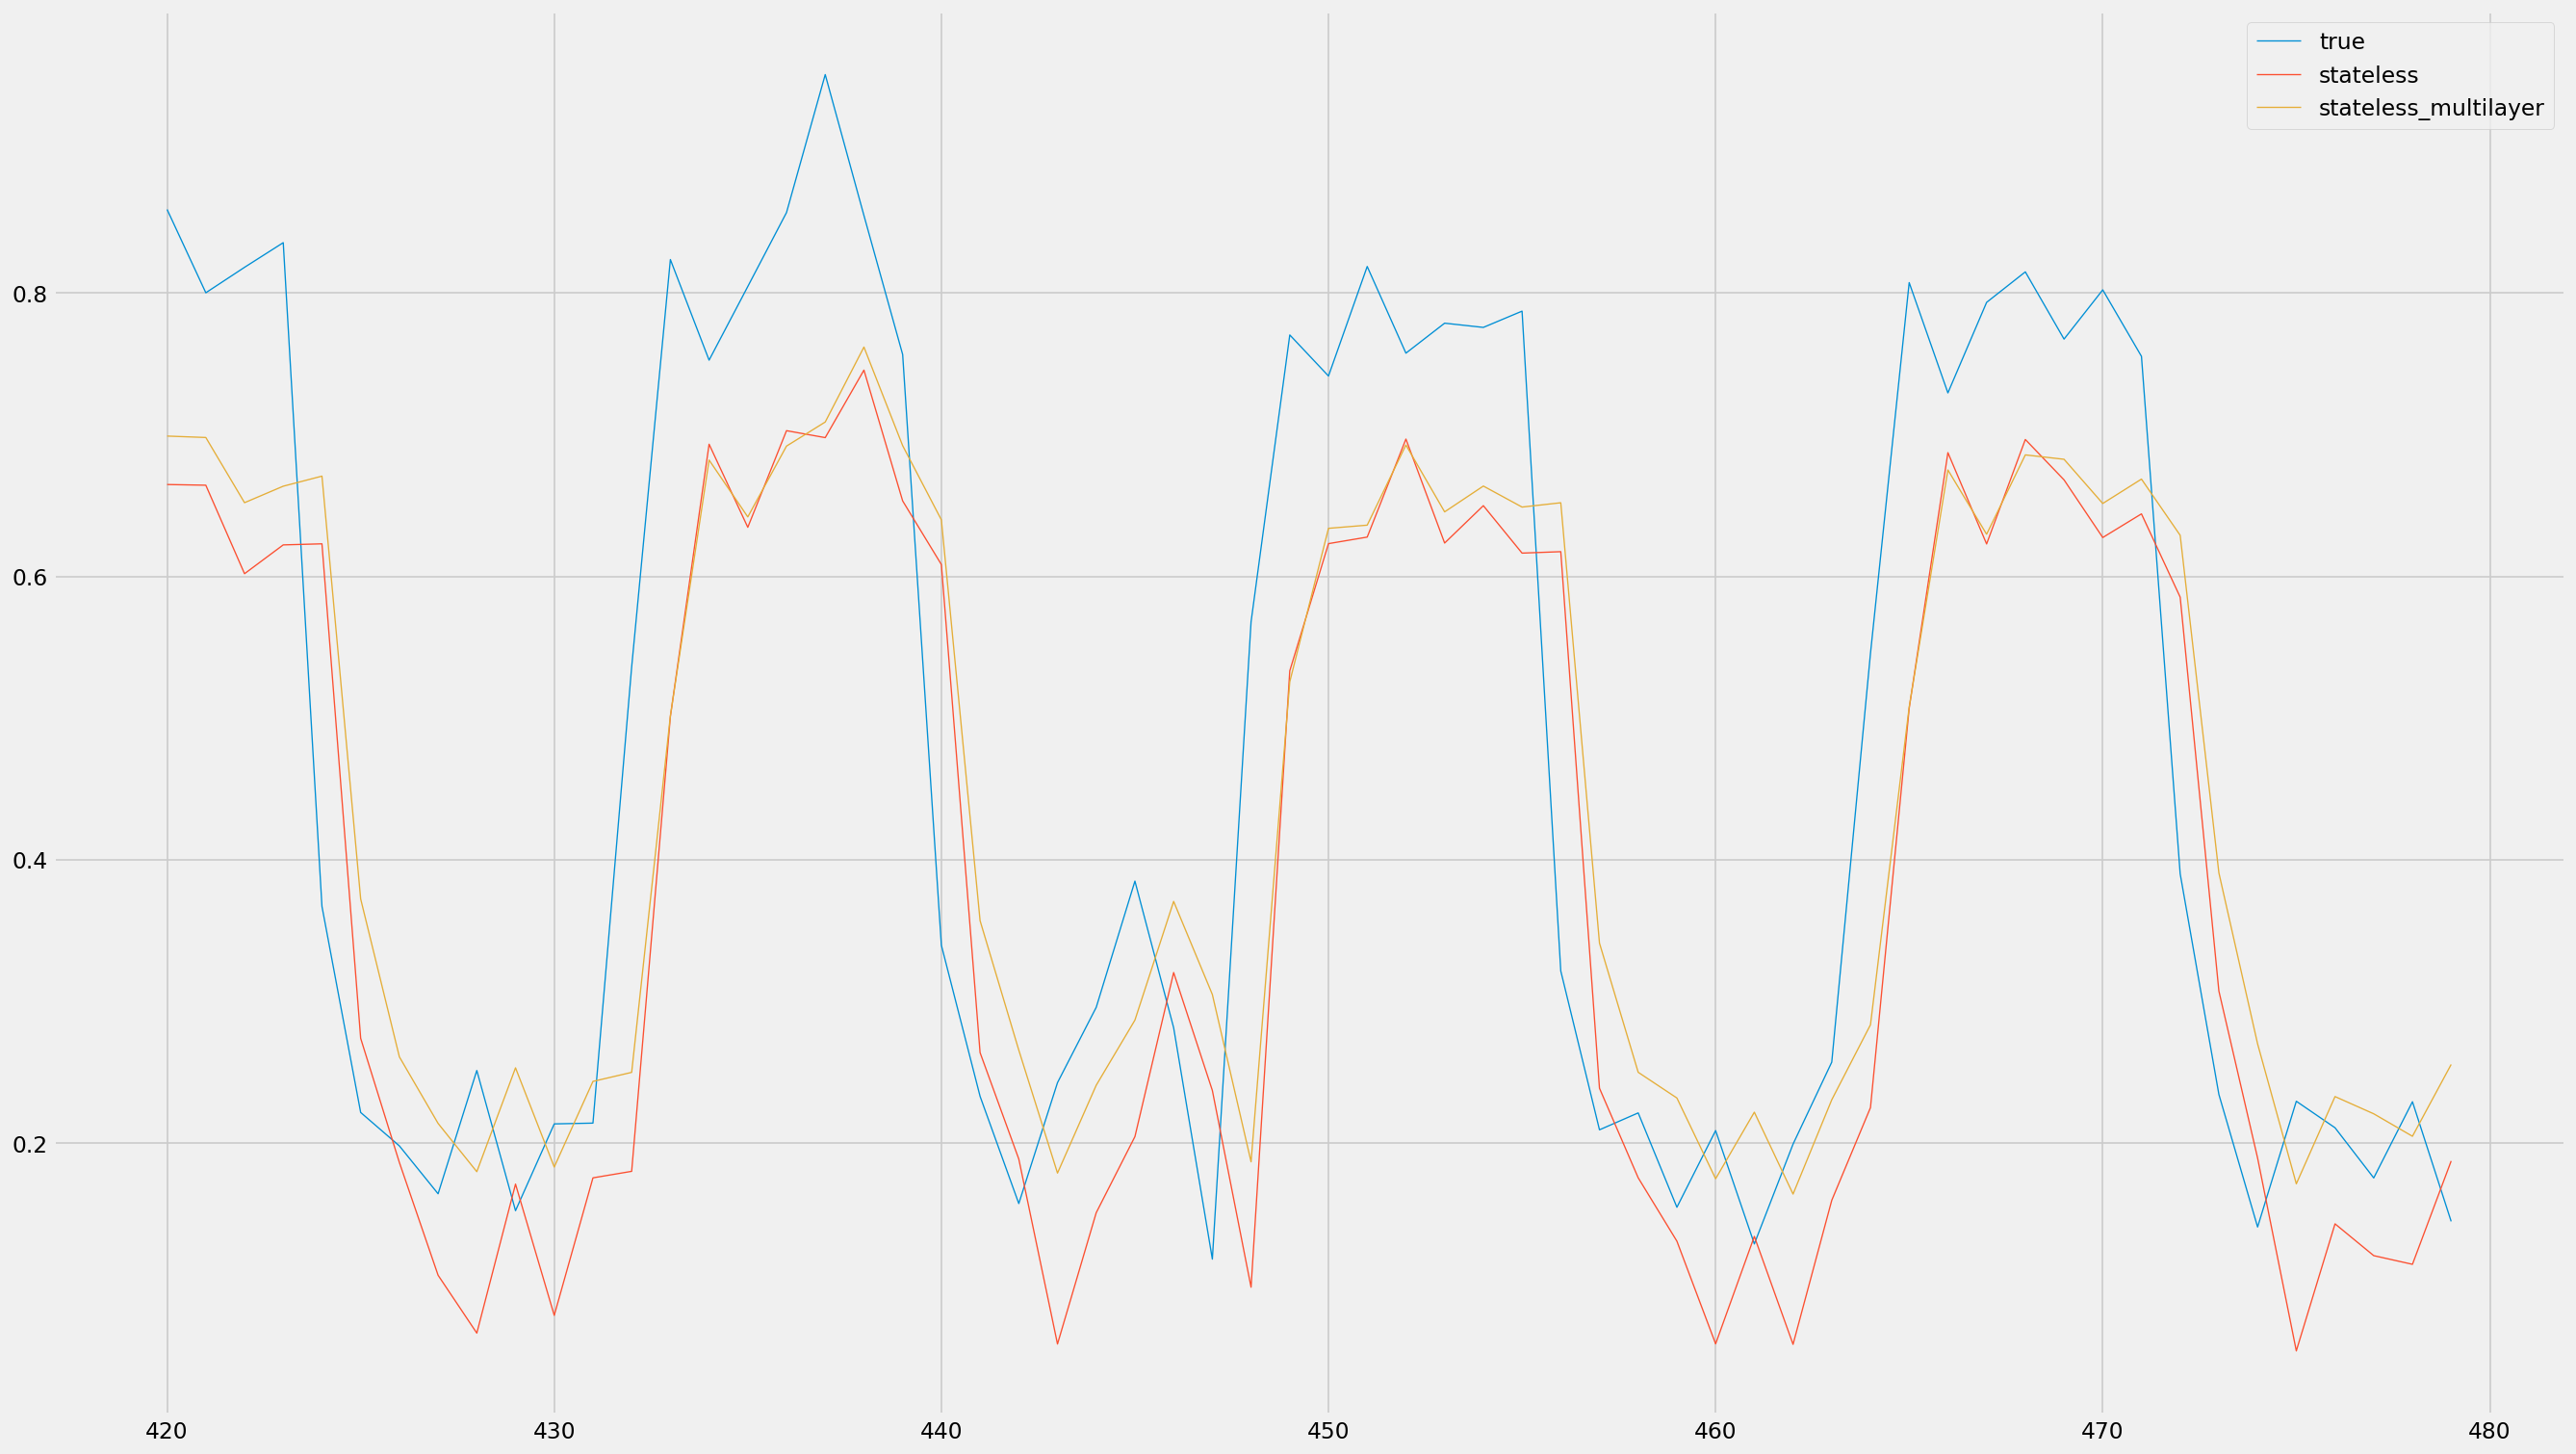

In [256]:
# Error assessment of the stacked LSTM
pred_train["stateless_multilayer"] = scaler.inverse_transform(
                              stateless_multilayer.predict(X_train,verbose=0)
).flatten()

pred_test["stateless_multilayer"] = scaler.inverse_transform(
                              stateless_multilayer.predict(X_test,verbose=0)
).flatten()

rmse_train["stateless_multilayer"] = rmse(pred_train["true"], pred_train["stateless_multilayer"])
rmse_test["stateless_multilayer"] = rmse(pred_test["true"], pred_test["stateless_multilayer"])

print('Train Score: %.6f RMSE' % (rmse_train["stateless_multilayer"]))
print('Test Score: %.6f RMSE' % (rmse_test["stateless_multilayer"]))

# Plot of forecasts and actuals
pd.DataFrame(pred_train)[["true","stateless","stateless_multilayer"]].plot(figsize=(25,15), lw=0.8)
plt.xlabel(' Days')
plt.ylabel('Electricity')
plt.show()

# and again for a specific time interval 
pd.DataFrame(pred_train)[["true","stateless","stateless_multilayer"]].iloc[420:480,:].plot(figsize=(25,15), lw=0.8)
plt.show()